# Business case:

-Create a model predicting potential Heart Diseases in people using Machine Learning algorithms.

-Suggestions to the Hospital  to awake the predictions of heart diseases  prevent life threats.

-Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Computational developments, in turn, allow the application of machine learning methods to detect "patterns" from the data that can predict a patient's condition.

In [1]:
#Importing all basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Removing warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading the data
data1=pd.read_csv('values.csv')
data1

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [4]:
#Loading the data
data2=pd.read_csv('labels.csv')
data2

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0
...,...,...
175,5qfar3,1
176,2s2b1f,1
177,nsd00i,1
178,0xw93k,0


In [5]:
data=pd.concat([data1,data2],axis=1)
data

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,patient_id,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0z64un,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,ryoo3j,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,yt1s1x,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,l2xjde,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,oyt4ek,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,5qfar3,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,2s2b1f,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,nsd00i,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0xw93k,0


In [6]:
# drop the irrelevant column
data.drop('patient_id',axis=1,inplace=True)
data

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


# Domain Analysis

## Heart Disease:

-The term “heart disease” is often used interchangeably with the term “cardiovascular disease”. Cardiovascular disease generally refers to conditions that involve narrowed or blocked blood vessels that can lead to a heart attack, chest pain (angina) or stroke. 

-Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 13 features that can be used to predict a possible heart disease.

-People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

### slope_of_peak_exercise_st_segment:
-The ST segment shift relative to exercise-induced increments in heart rate, the ST/heart rate slope (ST/HR slope), has been proposed as a more accurate ECG criterion for diagnosing significant coronary artery disease (CAD).

-The slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart.

### thal:
-The results of this test will tell you about the flow of blood to your heart through your coronary arteries. An abnormal test result can reveal coronary blockages as well as damage from heart attacks. The test can also spot an enlarged heart and other heart complications.

-Results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect

### resting_blood_pressure:
-If your blood pressure is higher than 120/80, you could be at risk for heart disease. High blood pressure (BP) is one of the most important risk factors for cardiovascular disease (CVD), which is the leading cause of mortality. 

### chest_pain_type:
-Chest pain causes include heart or lung issues, among many others. Some issues are life-threatening and need immediate treatment.

-Here chest pain type are of 4 values

### num_major_vessels:
-Number of major vessels colored by flourosopy.

-Here (0-3) colored by flourosopy

### fasting_blood_sugar_gt_120_mg_per_dl:
-As fasting glucose levels increased to >100 mg/dL, risks for CVD.

-Here fasting blood sugar > 120 mg/dl

### resting_ekg_results:
-Resting 12-lead electrocardiography (ECG) is a non-invasive test that can detect abnormalities including arrhythmias, evidence of coronary heart disease, left ventricular hypertrophy and bundle branch blocks.

-Here resting electrocardiographic results are of values 0,1,2


### serum_cholesterol_mg_per_dl:
-A person's serum cholesterol level can indicate their risk of developing conditions such as heart disease.

-Here Serum cholestoral in mg/dl 

### oldpeak_eq_st_depression:
-ST-segment depression is believed as a common electrocardiographic sign of myocardial ischemia during exercise testing. Ischemia is generally defined as oxygen deprivation due to reduced perfusion.

-oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms

### sex:
-Represents gender male or female

-Men generally develop CVD at a younger age and have a higher risk of coronary heart disease (CHD) than women. Women, in contrast, are at a higher risk of stroke, which often occurs at older age.

-Here 0: Female, 1: Male. 

### age:
-In men, the risk for heart attack increases significantly after the age of 45. In women, heart attacks are more likely to occur after the age of 50. A heart attack strikes someone about every 34 seconds. 

### max_heart_rate_achieved:
-Here Heart rate is a predictor of cardiovascular and all-cause mortality in the general population and in patients with cardiovascular disease.

-Maximum heart rate achieved (beats per minute)

### exercise_induced_angina:
-Angina may feel like pressure in the chest, jaw or arm. It often occurs with exercise or stress.When your heart works harder, it also needs more oxygen — oxygen it can't get because of the clogged coronary artery. The heart's lack of oxygen causes chest pain during exertion, a condition called angina. 

-Here exercise-induced chest pain (0: False, 1: True)




In [7]:
#rename the columns
data.rename(columns={'slope_of_peak_exercise_st_segment':'ST_Segment','thal':'Thallium_Test','resting_blood_pressure':'Resting_BP','chest_pain_type':'ChestPain_Type','num_major_vessels':'Vessels','fasting_blood_sugar_gt_120_mg_per_dl':'Fasting_BloodSugar','resting_ekg_results':'Resting_ECG','serum_cholesterol_mg_per_dl':'Serum_Cholesterol','oldpeak_eq_st_depression':'ST_Depression','sex':'Sex','age':'Age','max_heart_rate_achieved':'Max_HeartRate','exercise_induced_angina':'Angina_Exercise','heart_disease_present':'Heart_Disease'},inplace=True)

In [8]:
data.head()

,ST_Segment,Thallium_Test,Resting_BP,ChestPain_Type,Vessels,Fasting_BloodSugar,Resting_ECG,Serum_Cholesterol,ST_Depression,Sex,Age,Max_HeartRate,Angina_Exercise,Heart_Disease
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


# Basic Checks

In [9]:
#checking number of rows & columns
data.shape

(180, 14)

In [10]:
#column names
data.columns

Index(['ST_Segment', 'Thallium_Test', 'Resting_BP', 'ChestPain_Type',
       'Vessels', 'Fasting_BloodSugar', 'Resting_ECG', 'Serum_Cholesterol',
       'ST_Depression', 'Sex', 'Age', 'Max_HeartRate', 'Angina_Exercise',
       'Heart_Disease'],
      dtype='object')

In [11]:
#type of columns
data.dtypes

ST_Segment              int64
Thallium_Test          object
Resting_BP              int64
ChestPain_Type          int64
Vessels                 int64
Fasting_BloodSugar      int64
Resting_ECG             int64
Serum_Cholesterol       int64
ST_Depression         float64
Sex                     int64
Age                     int64
Max_HeartRate           int64
Angina_Exercise         int64
Heart_Disease           int64
dtype: object

In [12]:
#1st 5 rows
data.head()

,ST_Segment,Thallium_Test,Resting_BP,ChestPain_Type,Vessels,Fasting_BloodSugar,Resting_ECG,Serum_Cholesterol,ST_Depression,Sex,Age,Max_HeartRate,Angina_Exercise,Heart_Disease
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [13]:
#last 5 rows
data.tail()

,ST_Segment,Thallium_Test,Resting_BP,ChestPain_Type,Vessels,Fasting_BloodSugar,Resting_ECG,Serum_Cholesterol,ST_Depression,Sex,Age,Max_HeartRate,Angina_Exercise,Heart_Disease
175,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0
179,1,normal,160,3,1,0,0,201,0.0,0,54,163,0,0


In [14]:
#entire info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ST_Segment          180 non-null    int64  
 1   Thallium_Test       180 non-null    object 
 2   Resting_BP          180 non-null    int64  
 3   ChestPain_Type      180 non-null    int64  
 4   Vessels             180 non-null    int64  
 5   Fasting_BloodSugar  180 non-null    int64  
 6   Resting_ECG         180 non-null    int64  
 7   Serum_Cholesterol   180 non-null    int64  
 8   ST_Depression       180 non-null    float64
 9   Sex                 180 non-null    int64  
 10  Age                 180 non-null    int64  
 11  Max_HeartRate       180 non-null    int64  
 12  Angina_Exercise     180 non-null    int64  
 13  Heart_Disease       180 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 19.8+ KB


In [15]:
#statistical analysis of data
data.describe()

,ST_Segment,Resting_BP,ChestPain_Type,Vessels,Fasting_BloodSugar,Resting_ECG,Serum_Cholesterol,ST_Depression,Sex,Age,Max_HeartRate,Angina_Exercise,Heart_Disease
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ST_Segment,180.0,1.550000,0.618838,1.0,1.00,1.0,2.00,3.0
Resting_BP,180.0,131.311111,17.010443,94.0,120.00,130.0,140.00,180.0
ChestPain_Type,180.0,3.155556,0.938454,1.0,3.00,3.0,4.00,4.0
Vessels,180.0,0.694444,0.969347,0.0,0.00,0.0,1.00,3.0
Fasting_BloodSugar,180.0,0.161111,0.368659,0.0,0.00,0.0,0.00,1.0
Resting_ECG,180.0,1.050000,0.998742,0.0,0.00,2.0,2.00,2.0
Serum_Cholesterol,180.0,249.211111,52.717969,126.0,213.75,245.5,281.25,564.0
ST_Depression,180.0,1.010000,1.121357,0.0,0.00,0.8,1.60,6.2
Sex,180.0,0.688889,0.464239,0.0,0.00,1.0,1.00,1.0
Age,180.0,54.811111,9.334737,29.0,48.00,55.0,62.00,77.0


In [17]:
#check null values
data.isnull().sum()

ST_Segment            0
Thallium_Test         0
Resting_BP            0
ChestPain_Type        0
Vessels               0
Fasting_BloodSugar    0
Resting_ECG           0
Serum_Cholesterol     0
ST_Depression         0
Sex                   0
Age                   0
Max_HeartRate         0
Angina_Exercise       0
Heart_Disease         0
dtype: int64

In [18]:
#Unique value of output (target)
data.Heart_Disease.unique()

array([0, 1], dtype=int64)

In [19]:
#Records related to 0 & 1
data.Heart_Disease.value_counts()

0    100
1     80
Name: Heart_Disease, dtype: int64

In [20]:
#In categorical data: if unique is giving the value 1 then that categorical column is a constant column, simply drop them
data.describe(include='O')

,Thallium_Test
count,180
unique,3
top,normal
freq,98


Here unique is 3, so we are not dropping the column

# EDA

In [21]:
#Univariate Analysis

#installing sweetviz library
!pip install sweetviz

In [22]:
#importing sweetviz library
import sweetviz as sv
#syntax to use sweetviz
report = sv.analyze(data)
#Default arguments will generate to "SWEETVIZ_REPORT.html"
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<Axes: xlabel='Heart_Disease', ylabel='count'>

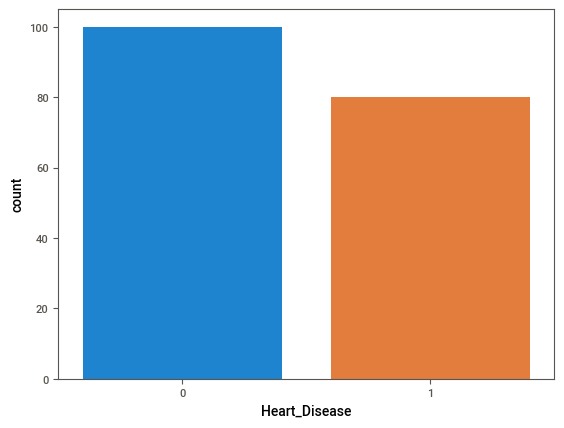

In [23]:
#Check for the data is balanced or not
sns.countplot(x=data.Heart_Disease)

Insight:

-The number of patients that will not have heart disease is much higher than those that will.
Therefore the data is not balanced.

-As the dataset is imbalanced, We have to handle it.



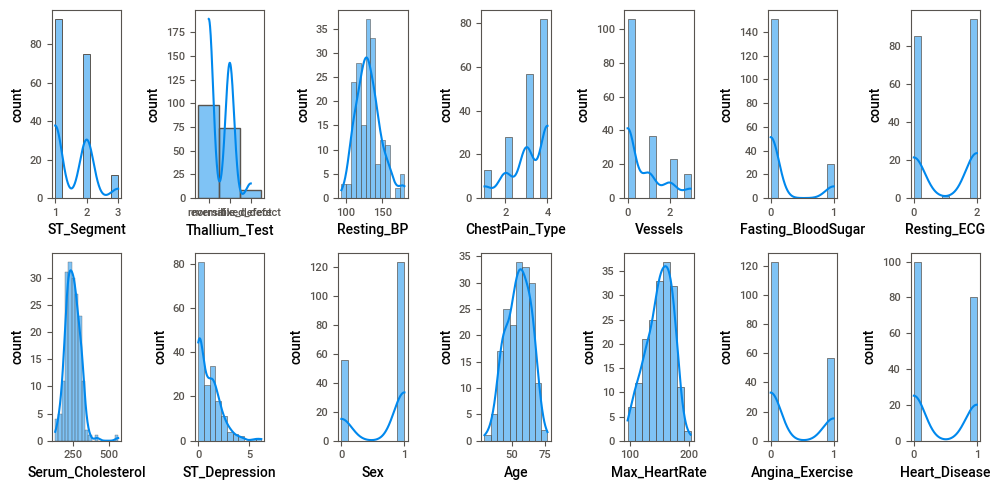

In [24]:
# set canvas size 
plt.figure(figsize=(10,5))
plotnum=1
for column in data:
    if plotnum<=14:
        ax=plt.subplot(2,7,plotnum)
        sns.histplot(x=data[column],kde=True)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('count',fontsize=10)
        plotnum+=1
    plt.tight_layout()

### Insights:

#### ST_Segment: 
-Here the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart is almost 50%.

#### Thallium_Test:  
-Here the Results of thallium stress test measuring blood flow to the heart, with possible values are more normal than fixed_defect and reversible_defect.

#### Resting_BP:  
-Here Resting blood pressure is near about 125 is more.

#### ChestPain_Type: 
-Here chest pain type 4 is more than other types.

#### Vessels: 
-Number of major vessels colored by flourosopy for 0 is more

#### Fasting_BloodSugar: 
-Here Fasting blood sugar > 120 mg/dl for 0 is more.

#### Resting_ECG: 
-Here Resting electrocardiographic results for 2 is more

#### Serum_Cholesterol: 
-Here Serum cholestoral in mg/dl is around 250

#### ST_Depression: ST-
-Here ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms is more for 0

#### Sex: 
0: Female, 1: Male. 
-Here Male can have more chances of heart disease

#### Age: 
-Here 55 yrs age of people can have majority chances of heart disease

#### Max_HeartRate: 
-Here Heart rate is a predictor of cardiovascular and all-cause mortality in the general population and in patients with cardiovascular disease.
-Here Maximum heart rate achieved is 170

#### Angina_Exercise: 
-Here Exercise-induced chest pain (0: False, 1: True) are maximum for False


<Axes: xlabel='Thallium_Test', ylabel='count'>

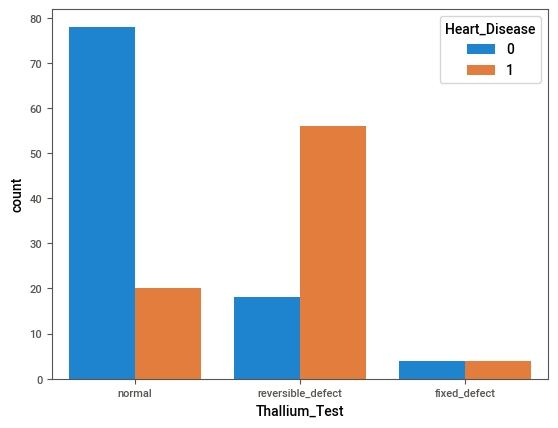

In [25]:
#Bivaraite Analysis

#categorical variables
sns.countplot(data=data,x='Thallium_Test',hue='Heart_Disease')


## Insight:

#### Thallium_Test:
-Here in thallium test  more than 70% for normal can not have heart disease, for reversible defect thallium test who is having more than 50% can have heart disease and with fixed defect the chances for heart disease is equal.

In [26]:
data.describe().columns

Index(['ST_Segment', 'Resting_BP', 'ChestPain_Type', 'Vessels',
       'Fasting_BloodSugar', 'Resting_ECG', 'Serum_Cholesterol',
       'ST_Depression', 'Sex', 'Age', 'Max_HeartRate', 'Angina_Exercise',
       'Heart_Disease'],
      dtype='object')

In [27]:
#Discrete data
disc=data[['ST_Segment', 'ChestPain_Type', 'Vessels',
       'Fasting_BloodSugar', 'Resting_ECG',
        'Sex', 'Angina_Exercise',
       'Heart_Disease']]

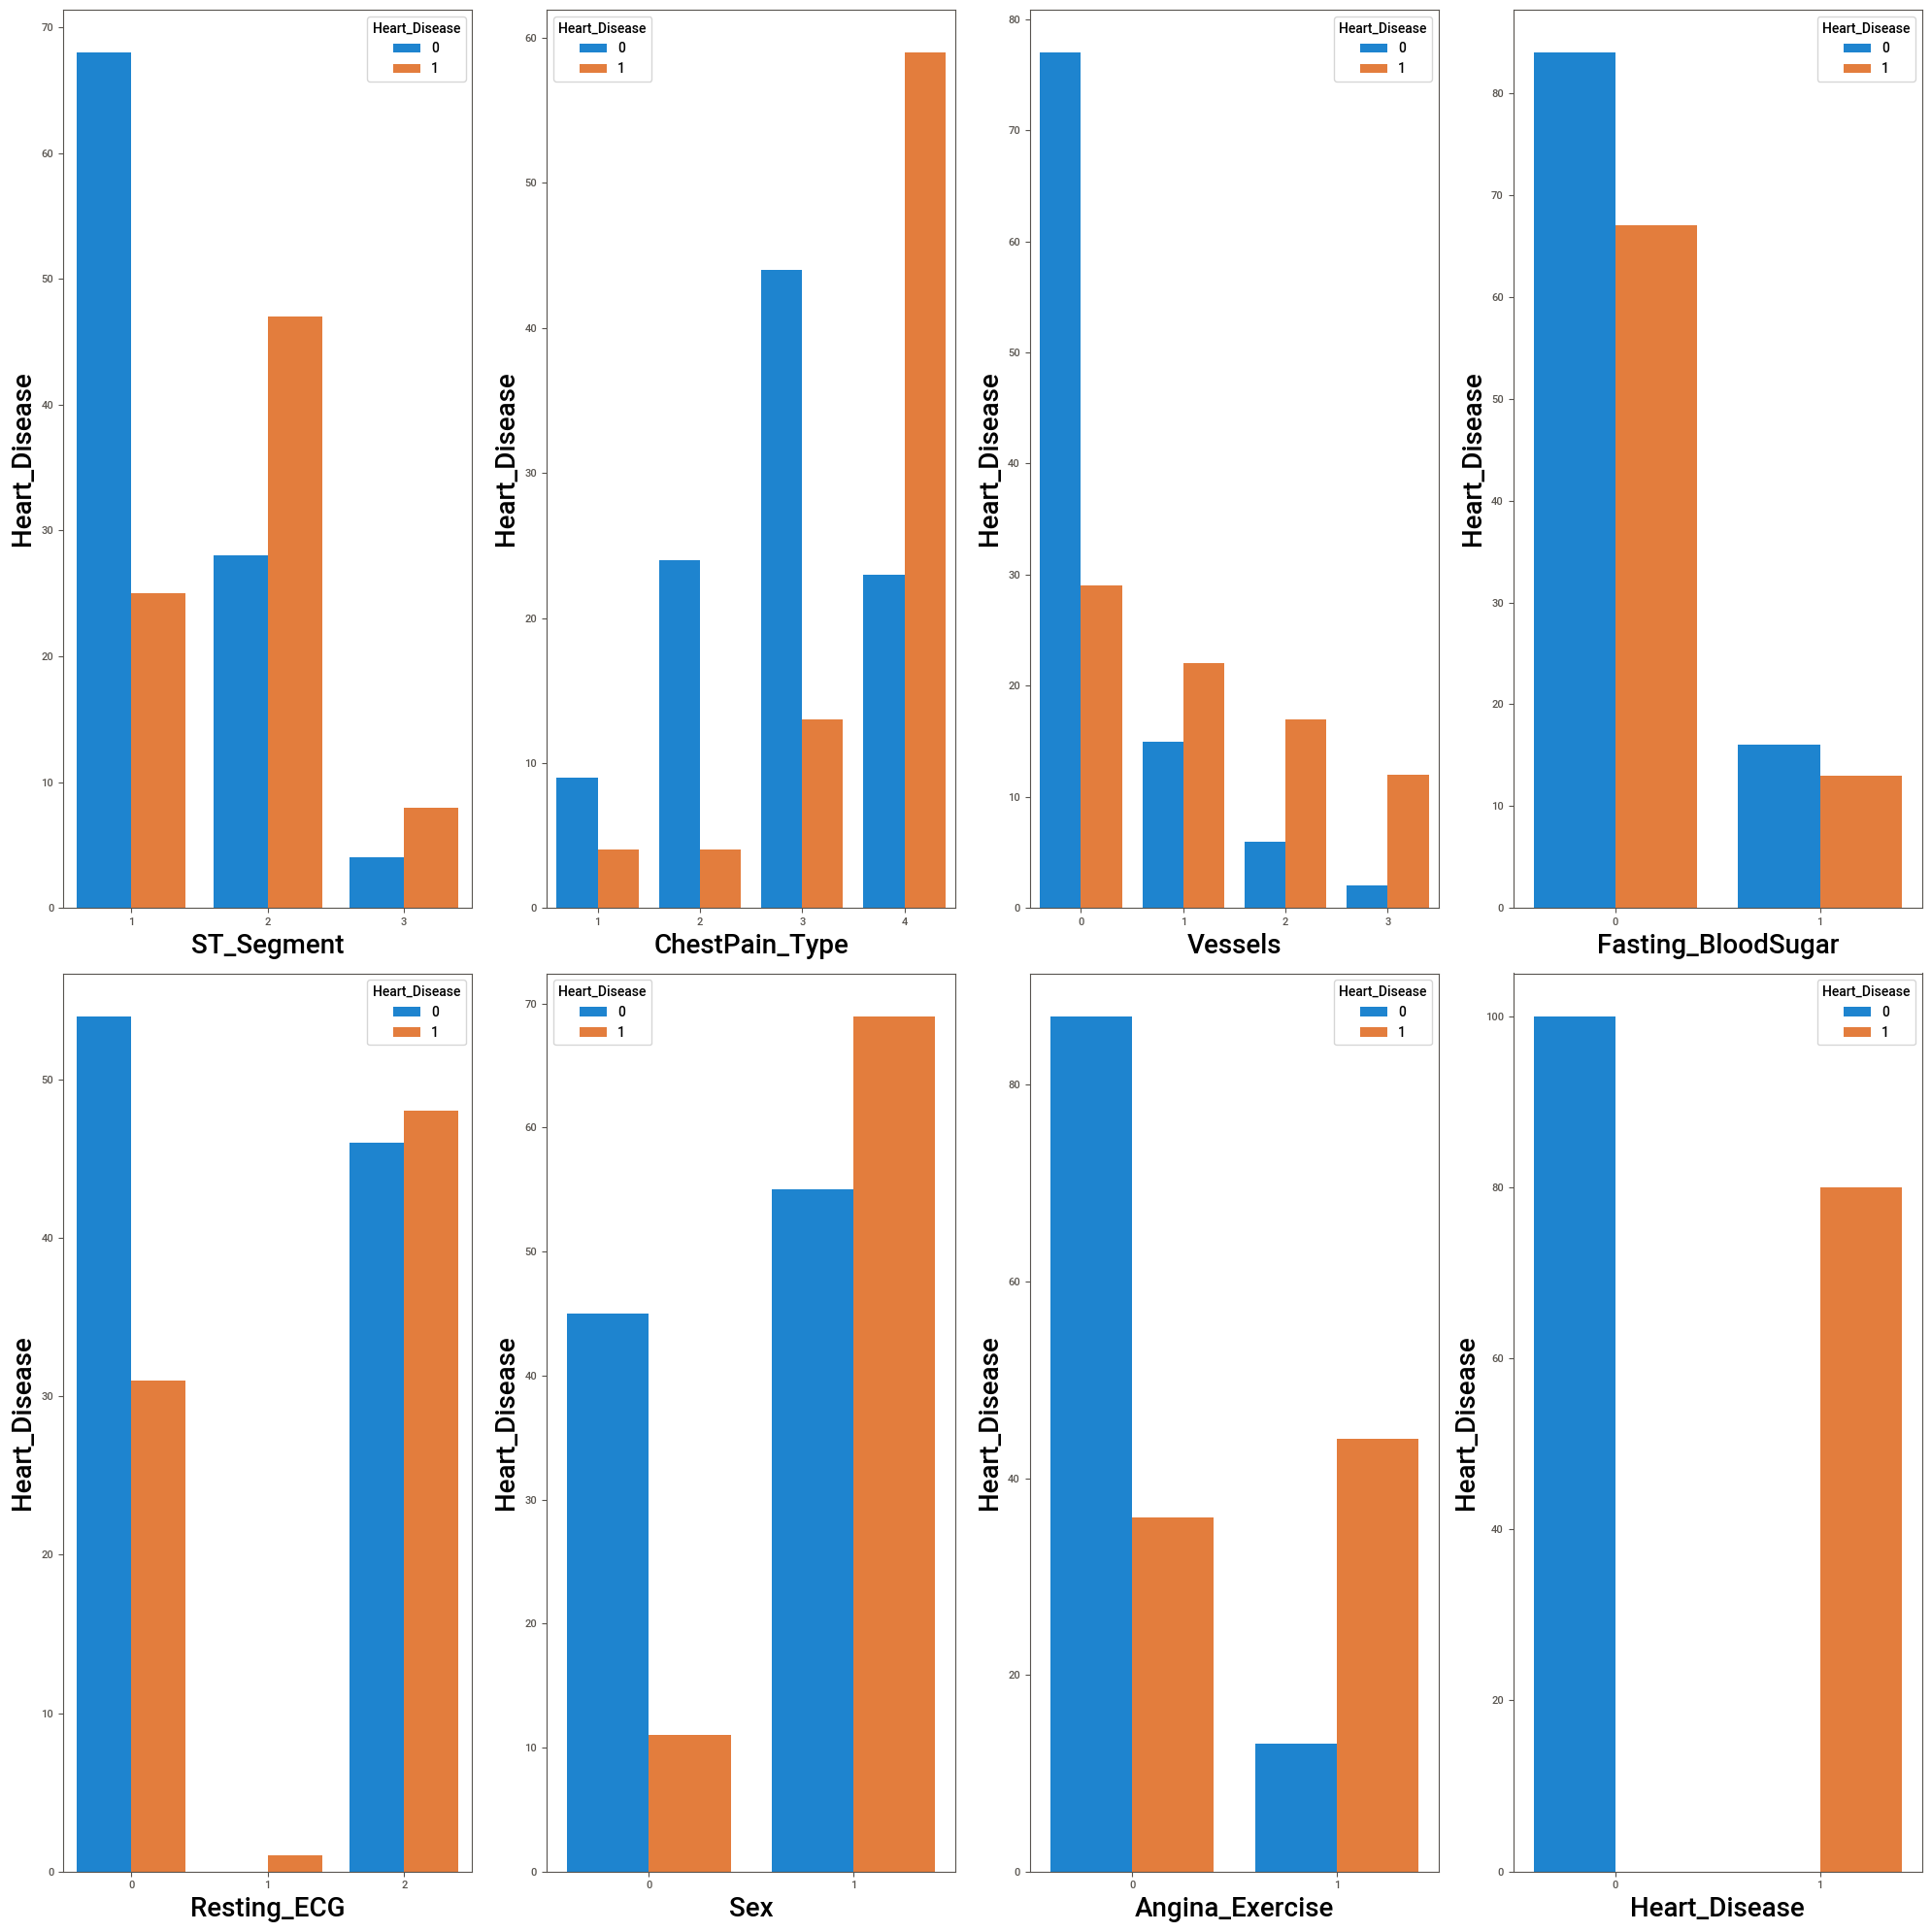

In [28]:
plt.figure(figsize=(20,20), facecolor='white')
plotnumber = 1

for column in disc:
    if plotnumber<=8 :
        ax = plt.subplot(2,4,plotnumber)
        sns.countplot(x=disc[column]
                        ,hue=data.Heart_Disease)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Heart_Disease',fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Insights:

#### ST_Segment:
 -Here the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart is more than 50% then can not have heart disease

#### ChestPain_Type:
-Here chest pain type 4 is more than other types that can have heart disease

#### Vessels:
-Number of major vessels colored by flourosopy for 0 is more that can not have heart disease

#### Fasting_BloodSugar:
-Here Fasting blood sugar > 120 mg/dl for 0 is more tahnt can not have hart disease

#### Resting_ECG:
-Here Resting electrocardiographic results for 0 is more and almost equal for 2 that can have or not have heart disease

#### Sex:
-0: Female, 1: Male. 
-Here Male can have more chances of heart disease

#### Angina_Exercise:
-Here Exercise-induced chest pain (0: False, 1: True) are maximum for False that means they can not have heart disease




In [29]:
#Continuous data
conti=data[['Resting_BP', 'Serum_Cholesterol',
       'ST_Depression', 'Age', 'Max_HeartRate']]

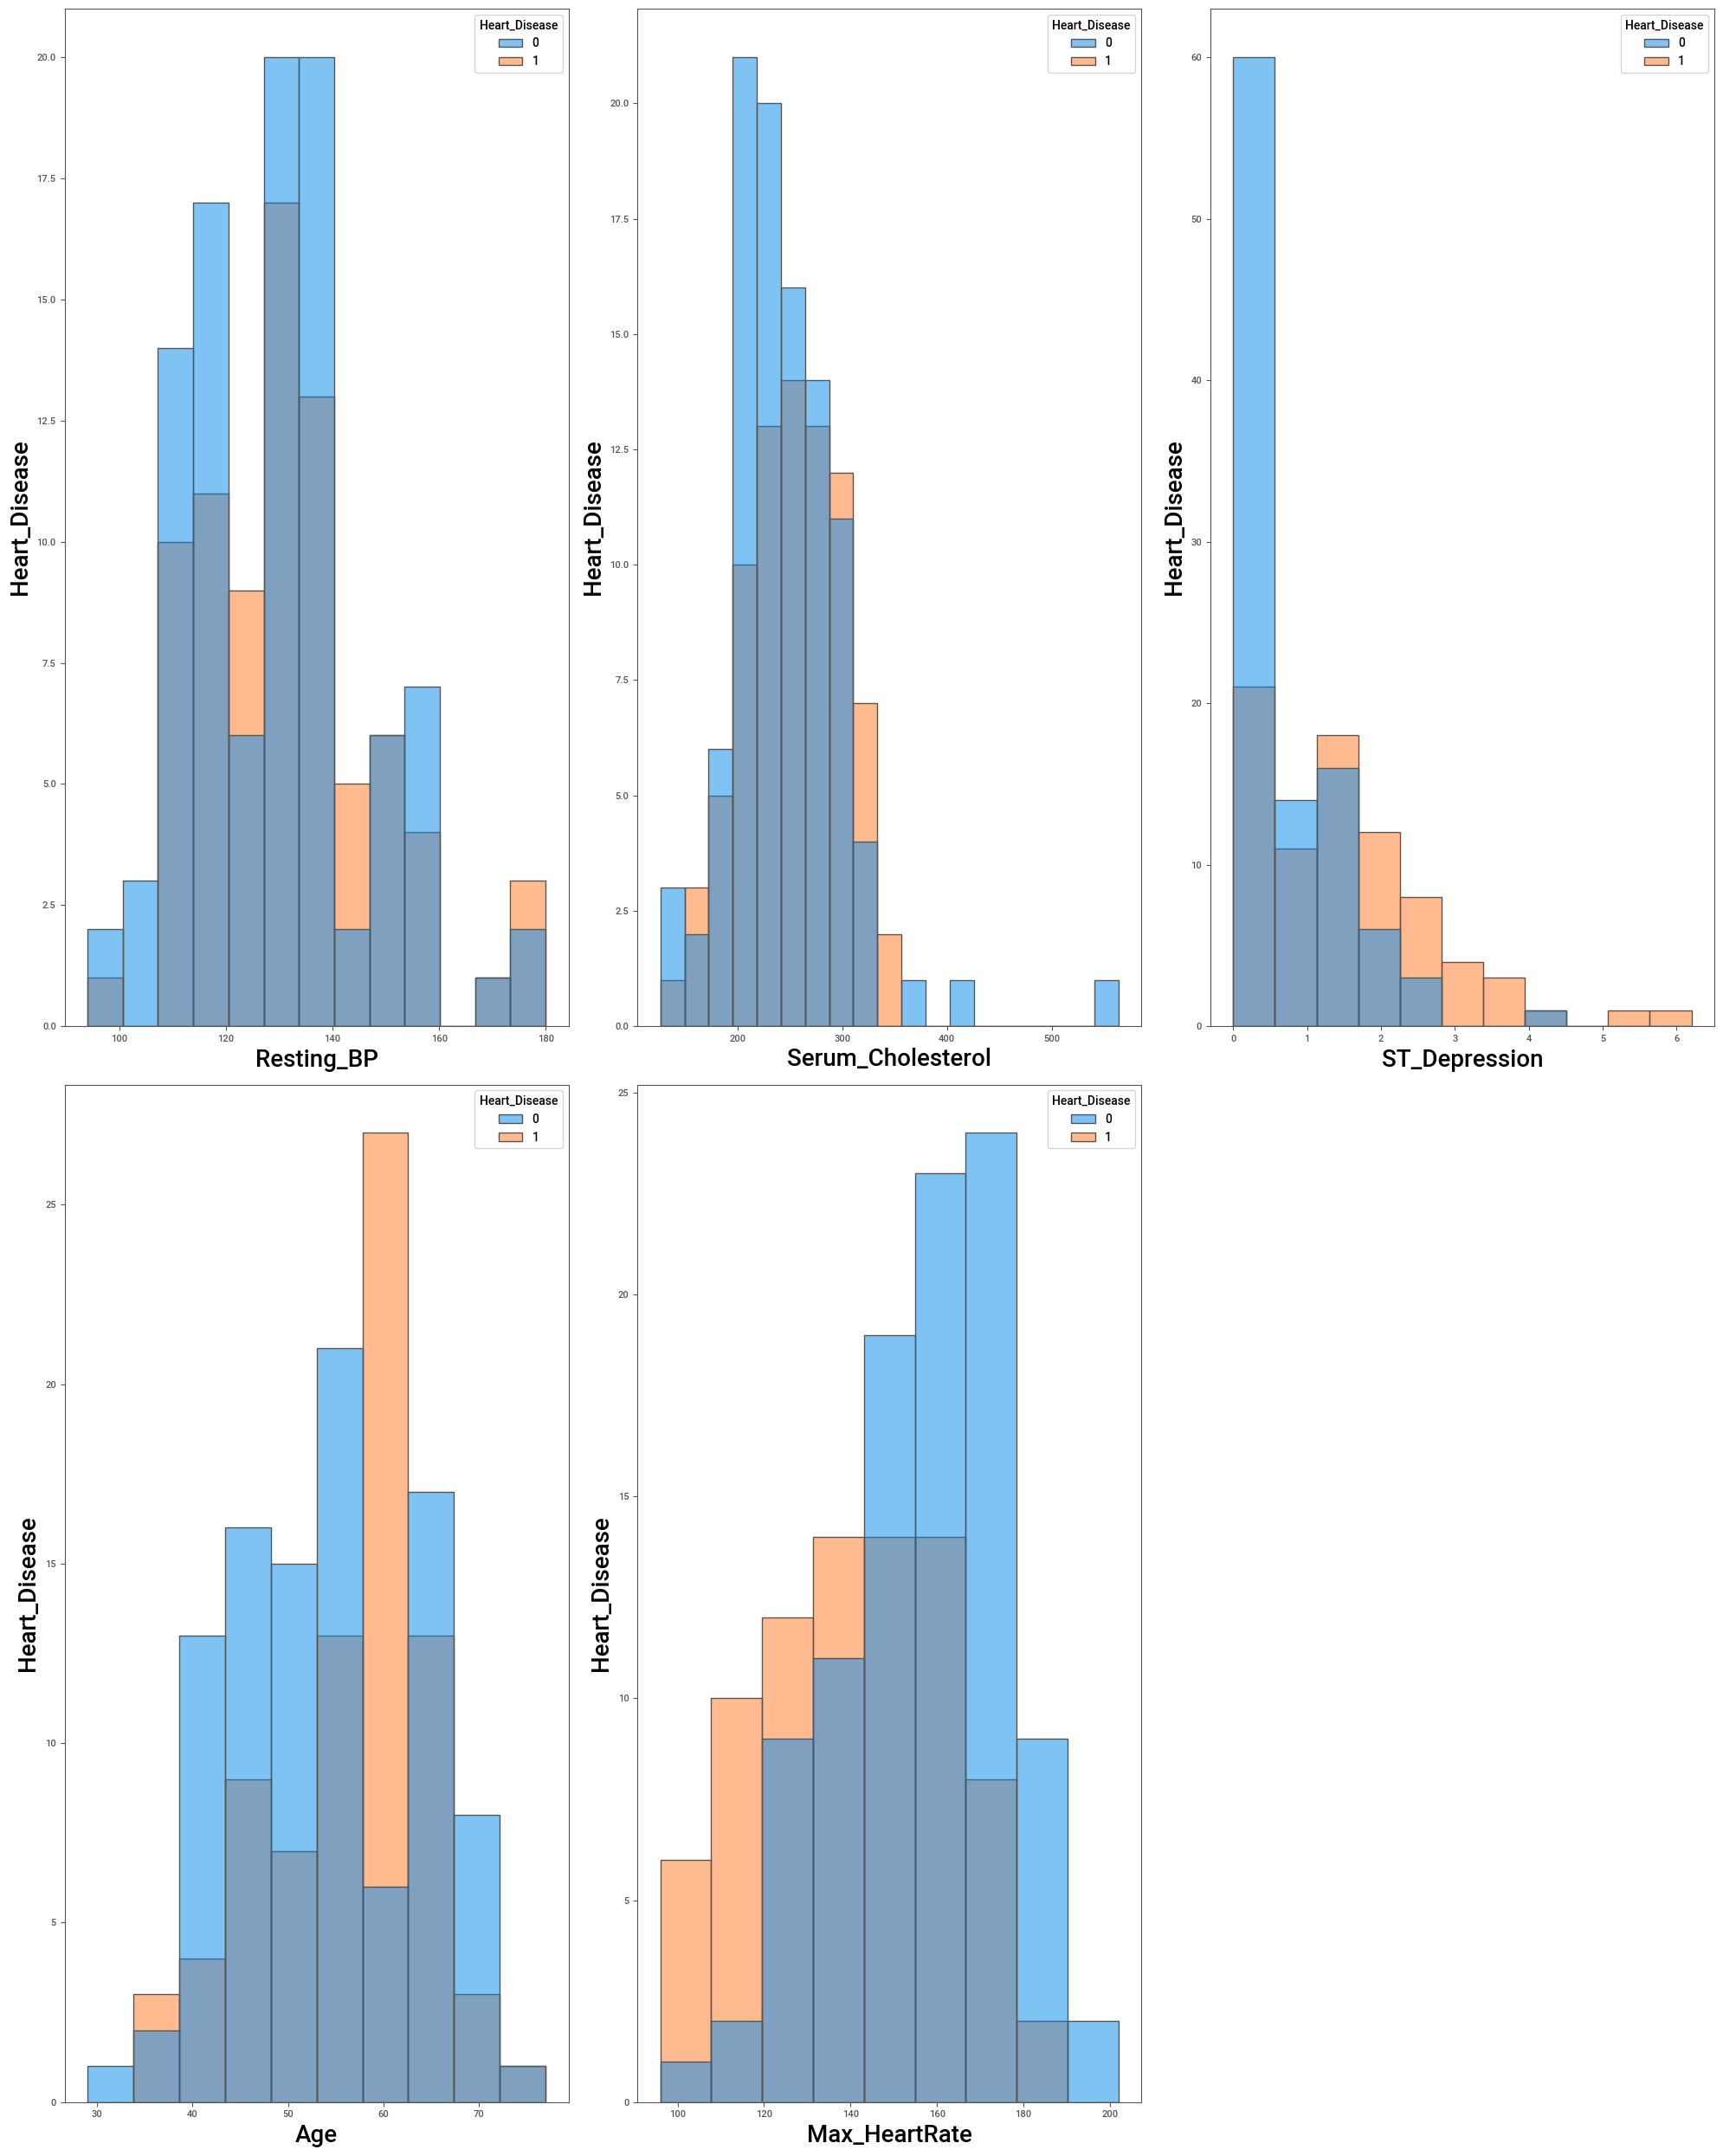

In [30]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in conti:
    if plotnumber<=5 :
        ax = plt.subplot(2,3,plotnumber)
        sns.histplot(x=conti[column]         
                        ,hue=data.Heart_Disease)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Heart_Disease',fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Insights:

#### Resting_BP:
- Here Resting blood pressure is near about 125-130 is more who can have or not vae heart disease


#### Serum_Cholesterol:
- Here Serum cholestoral in mg/dl is around 200-250 who can not have heart disease


#### ST_Depression:
- Here ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms is more for 0 who can not have heart disease


#### Age:
- Here 55-60 yrs age of people can have majority chances of heart disease


#### Max_HeartRate:
- Here Maximum heart rate achieved is 170 who can not have heart disease

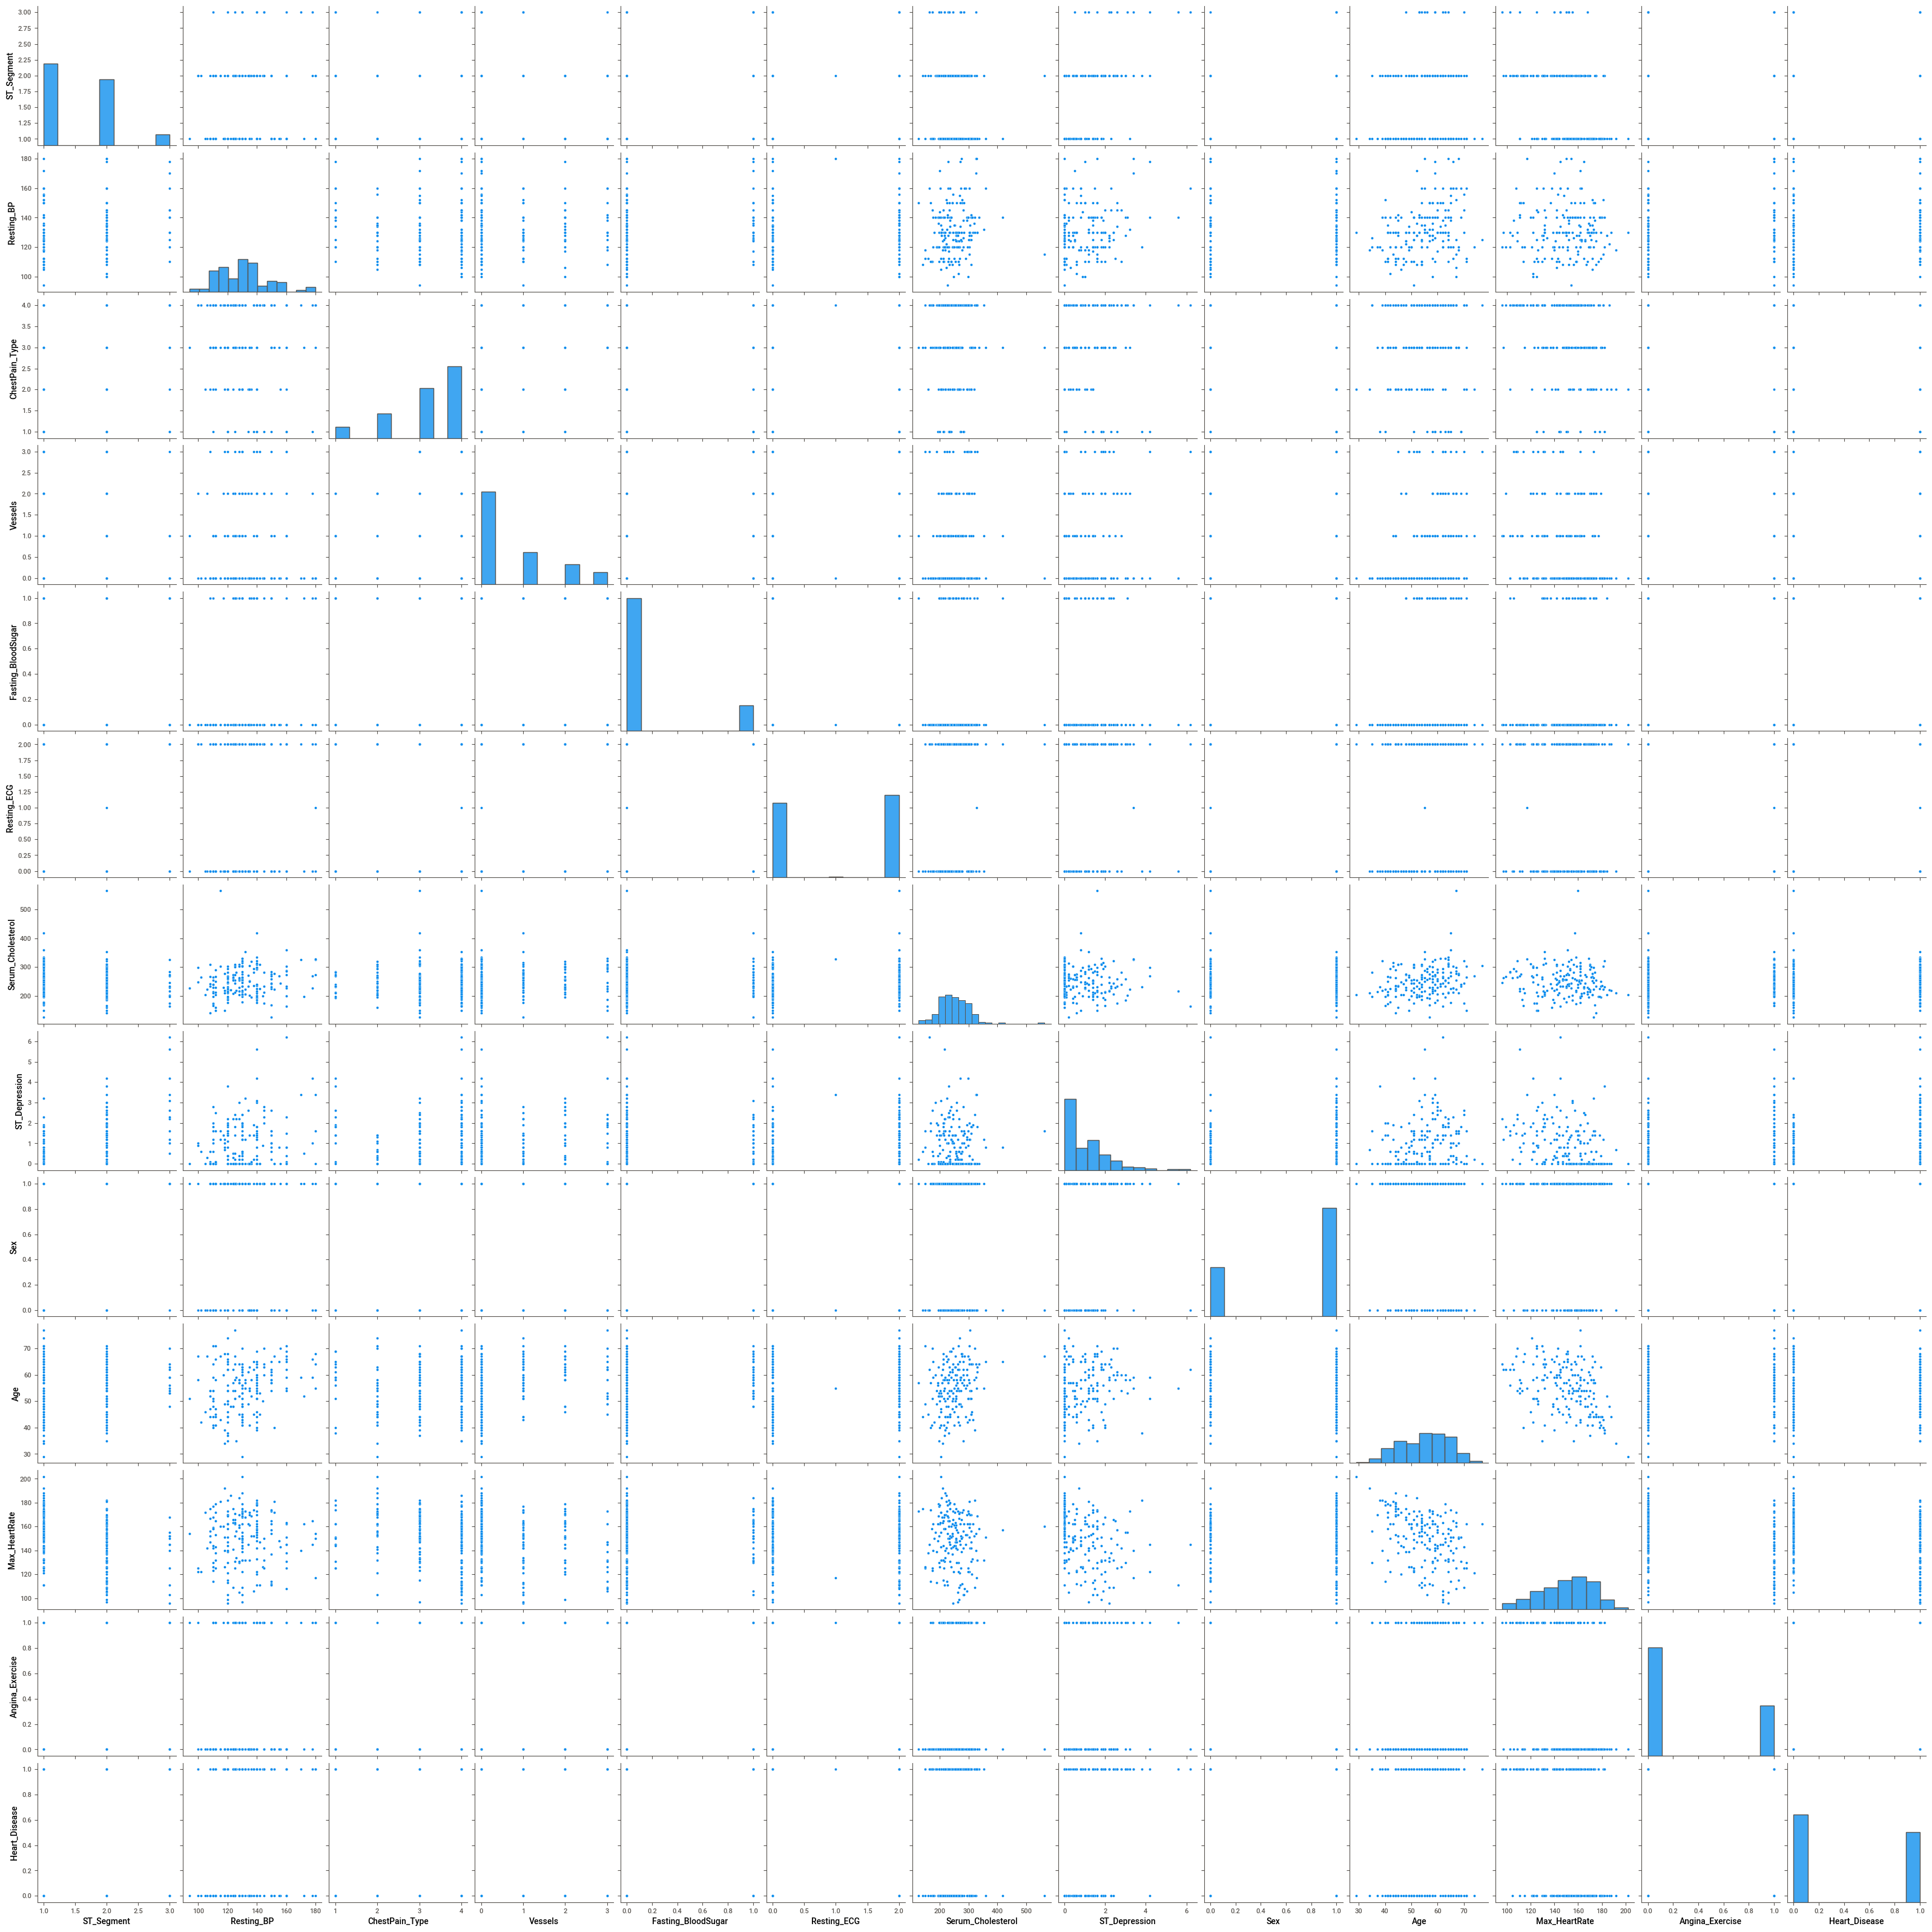

In [31]:
#Multivariate Analysis
sns.pairplot(data)

In [32]:
data.Thallium_Test.unique()

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

In [33]:
data.Thallium_Test.value_counts()

normal               98
reversible_defect    74
fixed_defect          8
Name: Thallium_Test, dtype: int64

# Data Preprocessing

In [34]:
#check for missing values
data.isnull().sum()

ST_Segment            0
Thallium_Test         0
Resting_BP            0
ChestPain_Type        0
Vessels               0
Fasting_BloodSugar    0
Resting_ECG           0
Serum_Cholesterol     0
ST_Depression         0
Sex                   0
Age                   0
Max_HeartRate         0
Angina_Exercise       0
Heart_Disease         0
dtype: int64

In [35]:
#check for duplicates
data.duplicated().sum()

0

<Axes: xlabel='ST_Segment'>

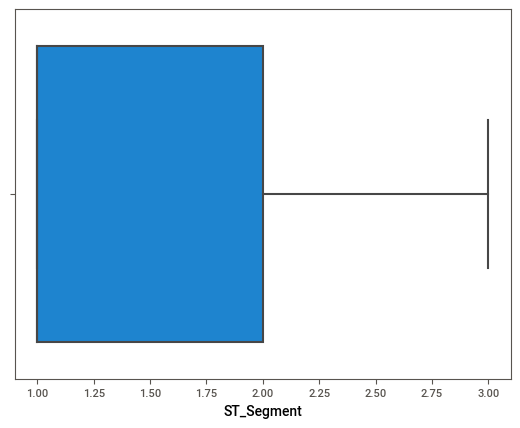

In [36]:
#Check for Outliers
sns.boxplot(x=data.ST_Segment)

<Axes: xlabel='Resting_BP'>

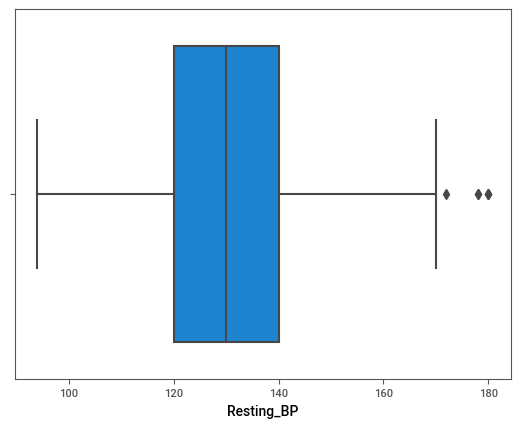

In [37]:
sns.boxplot(x=data.Resting_BP)

<Axes: xlabel='ChestPain_Type'>

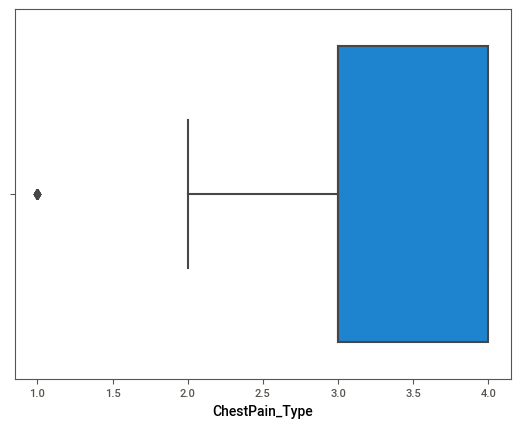

In [38]:
sns.boxplot(x=data.ChestPain_Type)

<Axes: xlabel='Vessels'>

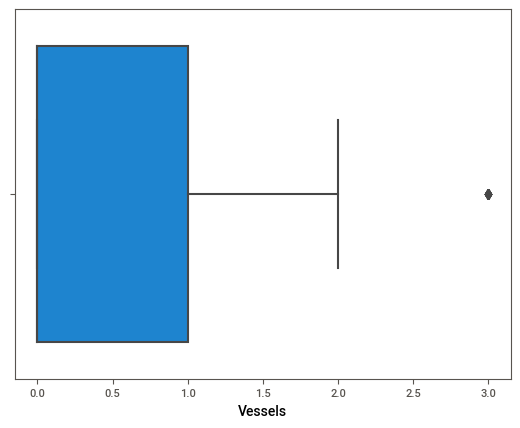

In [39]:
sns.boxplot(x=data.Vessels)

<Axes: xlabel='Fasting_BloodSugar'>

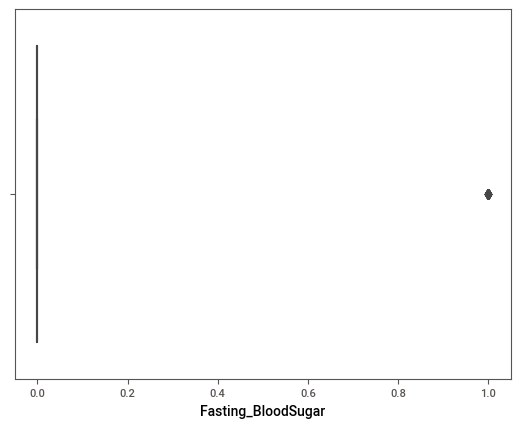

In [40]:
sns.boxplot(x=data.Fasting_BloodSugar)

<Axes: xlabel='Resting_ECG'>

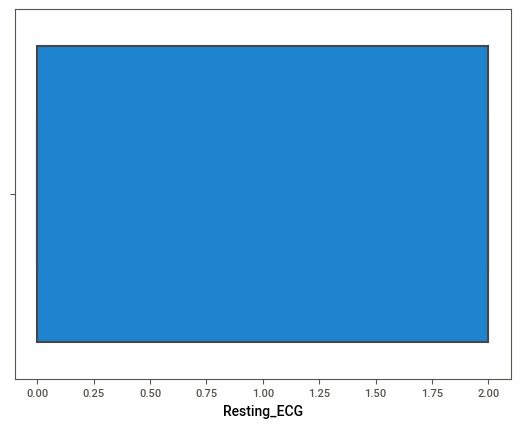

In [41]:
sns.boxplot(x=data.Resting_ECG)

<Axes: xlabel='Serum_Cholesterol'>

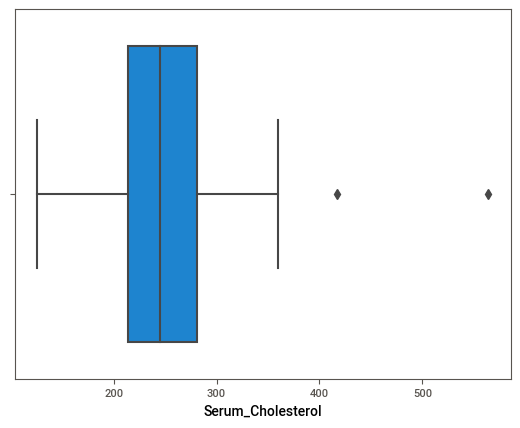

In [42]:
sns.boxplot(x=data.Serum_Cholesterol)

<Axes: xlabel='ST_Depression'>

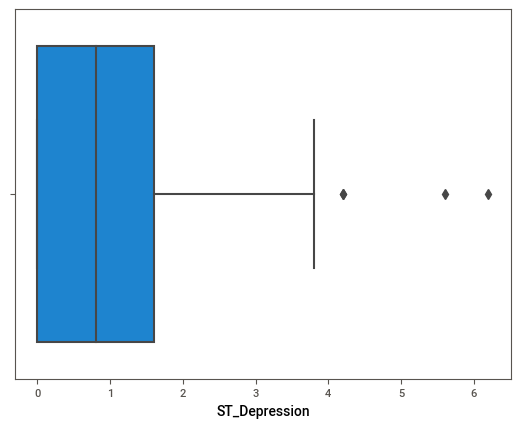

In [43]:
sns.boxplot(x=data.ST_Depression)

<Axes: xlabel='Age'>

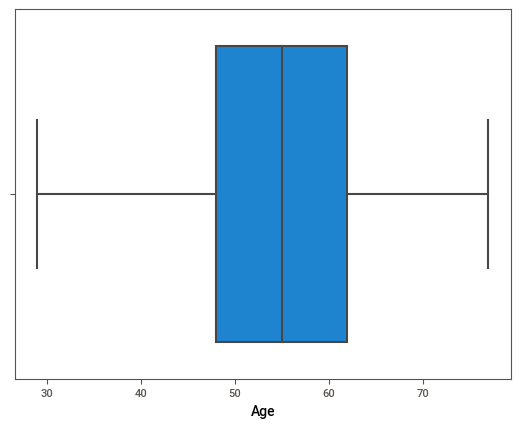

In [44]:
sns.boxplot(x=data.Age)

<Axes: xlabel='Max_HeartRate'>

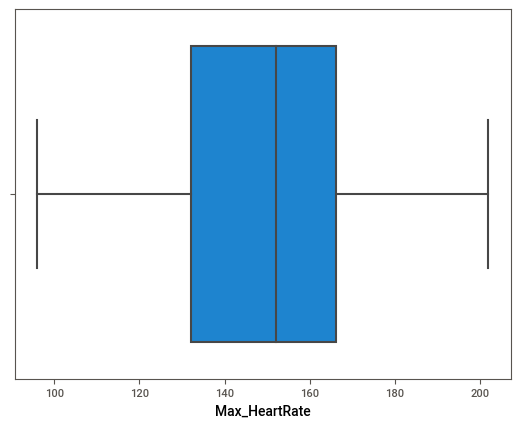

In [45]:
sns.boxplot(x=data.Max_HeartRate)

## Insights:

Here is outlier in Resting_BP , ChestPain_Type, Vessels,  Fasting_BloodSugar, Serum_Cholesterol , ST_Depression column.
now handle them:
1) IQR: method is used when data is not normal
2) 3 Sigma Rule: method is used when data is normal

In [46]:
#Handle outliers

<Axes: ylabel='Density'>

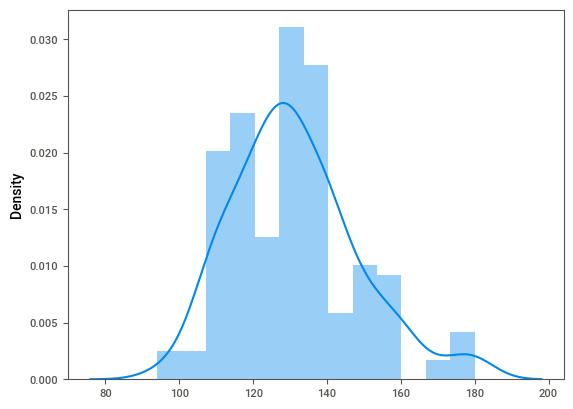

In [47]:
#Resting_BP
#check distribution 
sns.distplot(x=data['Resting_BP'])

Here data is not normal , so we will use IQR method

In [48]:
#find Q1
Q1=data['Resting_BP'].quantile(0.25)
print('lower quantile',Q1)

lower quantile 120.0


In [49]:
#find Q3
Q3=data['Resting_BP'].quantile(0.75)
print('Upper quantile',Q3)

Upper quantile 140.0


In [50]:
#calculate IQR
IQR=Q3-Q1
IQR

20.0

In [51]:
#Find lower limit & upper limit
lower_limit=Q1-1.5*IQR
print('lower limit',lower_limit)

lower limit 90.0


In [52]:
upper_limit=Q3+1.5*IQR
print('Upper limit',upper_limit)

Upper limit 170.0


In [53]:
#find the values below the lower limit
data.loc[data['Resting_BP']<lower_limit]

,ST_Segment,Thallium_Test,Resting_BP,ChestPain_Type,Vessels,Fasting_BloodSugar,Resting_ECG,Serum_Cholesterol,ST_Depression,Sex,Age,Max_HeartRate,Angina_Exercise,Heart_Disease


In [54]:
#since there is no outlier in lower limit no need to handle it.

In [55]:
#find the values above the upper limit
data.loc[data['Resting_BP']>upper_limit]

,ST_Segment,Thallium_Test,Resting_BP,ChestPain_Type,Vessels,Fasting_BloodSugar,Resting_ECG,Serum_Cholesterol,ST_Depression,Sex,Age,Max_HeartRate,Angina_Exercise,Heart_Disease
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
33,1,normal,180,4,0,0,0,325,0.0,0,64,154,1,0
72,1,reversible_defect,172,3,0,1,0,199,0.5,1,52,162,0,0
75,2,reversible_defect,178,4,2,1,0,228,1.0,0,66,165,1,1
113,2,reversible_defect,180,3,0,1,2,274,1.6,1,68,150,1,1
176,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1


In [56]:
#find the percentage of outliers:
#if the percentage <5% (less than 5%), then only we will handle outliers
#if the perceentage >5% (greater than 5%), then dont handle it 

In [57]:
#find the len of upper limit
len(data.loc[data['Resting_BP']>upper_limit])

6

In [58]:
#len of data
len(data)

180

In [59]:
#devide len of upper limit by len of data
len(data.loc[data['Resting_BP']>upper_limit])/len(data)

0.03333333333333333

In [60]:
#to convert it into percentage multiply by 100
(len(data.loc[data['Resting_BP']>upper_limit])/len(data))*100

3.3333333333333335

In [61]:
#3% of outlier is there , handle it by replacing those observations which giving you outlier by median since data is not normal

In [62]:
data.loc[data['Resting_BP']>upper_limit,'Resting_BP']=data['Resting_BP'].median()

In [63]:
#we successfully handle outliers wrt upper limit

<Axes: ylabel='Density'>

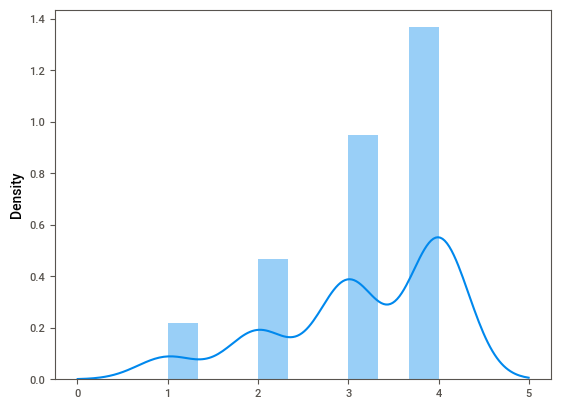

In [64]:
#ChestPain_Type
#check distribution 
sns.distplot(x=data['ChestPain_Type'])

In [65]:
#find Q1
Q1=data['ChestPain_Type'].quantile(0.25)
print('lower quantile',Q1)

lower quantile 3.0


In [66]:
#find Q3
Q3=data['ChestPain_Type'].quantile(0.75)
print('Upper quantile',Q3)

Upper quantile 4.0


In [67]:
#calculate IQR
IQR=Q3-Q1
IQR

1.0

In [68]:
#Find lower limit & upper limit
lower_limit=Q1-1.5*IQR
print('lower limit',lower_limit)

lower limit 1.5


In [69]:
upper_limit=Q3+1.5*IQR
print('Upper limit',upper_limit)

Upper limit 5.5


In [70]:
#find the values below the lower limit
data.loc[data['ChestPain_Type']<lower_limit]

,ST_Segment,Thallium_Test,Resting_BP,ChestPain_Type,Vessels,Fasting_BloodSugar,Resting_ECG,Serum_Cholesterol,ST_Depression,Sex,Age,Max_HeartRate,Angina_Exercise,Heart_Disease
4,3,reversible_defect,130,1,0,0,2,270,4.2,1,59,145,0,0
14,2,reversible_defect,120,1,0,0,0,231,3.8,1,38,182,1,1
97,2,normal,160,1,1,1,2,234,0.1,1,69,131,0,0
99,1,normal,150,1,0,1,2,283,1.0,0,58,162,0,0
108,1,normal,125,1,1,0,2,213,1.4,1,51,125,1,0
120,2,normal,138,1,1,1,2,282,1.4,1,65,174,0,1
141,2,reversible_defect,120,1,0,0,2,193,1.9,1,56,162,0,0
146,1,reversible_defect,140,1,0,0,0,199,1.4,1,40,178,1,0
147,2,normal,134,1,2,0,0,234,2.6,1,61,145,0,1
155,1,normal,160,1,0,0,2,273,0.0,1,59,125,0,1


In [71]:
#find the values above the upper limit
data.loc[data['ChestPain_Type']>upper_limit]

,ST_Segment,Thallium_Test,Resting_BP,ChestPain_Type,Vessels,Fasting_BloodSugar,Resting_ECG,Serum_Cholesterol,ST_Depression,Sex,Age,Max_HeartRate,Angina_Exercise,Heart_Disease


In [72]:
#since there is no outlier in upper limit no need to handle it.

In [73]:
#find the len of lower limit
len(data.loc[data['ChestPain_Type']<lower_limit])


13

In [74]:
#len of data
len(data)

180

In [75]:
#devide len of lower limit by len of data
len(data.loc[data['ChestPain_Type']<lower_limit])/len(data)

0.07222222222222222

In [76]:
#to convert it into percentage multiply by 100
(len(data.loc[data['ChestPain_Type']<lower_limit])/len(data))*100

7.222222222222221

In [77]:
#the perceentage  is > 5% (greater than 5%), then dont handle it 

<Axes: ylabel='Density'>

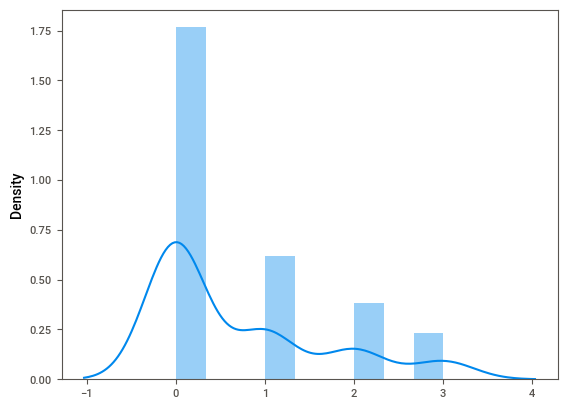

In [78]:
#Vessels
#check distribution 
sns.distplot(x=data['Vessels'])

In [79]:
#find Q1
Q1=data['Vessels'].quantile(0.25)
print('lower quantile',Q1)

lower quantile 0.0


In [80]:
#find Q3
Q3=data['Vessels'].quantile(0.75)
print('Upper quantile',Q3)

Upper quantile 1.0


In [81]:
#calculate IQR
IQR=Q3-Q1
IQR

1.0

In [82]:
#Find lower limit & upper limit
lower_limit=Q1-1.5*IQR
print('lower limit',lower_limit)

lower limit -1.5


In [83]:
upper_limit=Q3+1.5*IQR
print('Upper limit',upper_limit)

Upper limit 2.5


In [84]:
#find the values below the lower limit
data.loc[data['Vessels']<lower_limit]

,ST_Segment,Thallium_Test,Resting_BP,ChestPain_Type,Vessels,Fasting_BloodSugar,Resting_ECG,Serum_Cholesterol,ST_Depression,Sex,Age,Max_HeartRate,Angina_Exercise,Heart_Disease


In [85]:
#since there is no outlier in lower limit no need to handle it.

In [86]:
#find the values above the upper limit
data.loc[data['Vessels']>upper_limit]

,ST_Segment,Thallium_Test,Resting_BP,ChestPain_Type,Vessels,Fasting_BloodSugar,Resting_ECG,Serum_Cholesterol,ST_Depression,Sex,Age,Max_HeartRate,Angina_Exercise,Heart_Disease
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
21,1,reversible_defect,108,4,3,1,0,233,0.1,1,52,147,0,0
31,2,reversible_defect,150,4,3,0,2,225,1.0,0,65,114,0,1
52,1,reversible_defect,130,4,3,1,2,330,1.8,1,63,132,1,1
66,2,normal,130,4,3,0,2,322,2.4,1,70,109,0,1
69,2,reversible_defect,120,3,3,0,0,188,2.0,1,49,139,0,1
85,1,normal,118,3,3,0,2,149,0.8,1,49,126,0,1
112,2,reversible_defect,140,4,3,0,0,298,4.2,1,51,122,1,1
119,2,normal,138,4,3,1,0,294,1.9,0,62,106,0,1
123,1,normal,130,3,3,1,2,246,0.0,1,53,173,0,0


In [87]:
#find the len of upper limit
len(data.loc[data['Vessels']>upper_limit])


14

In [88]:
#len of data
len(data)

180

In [89]:
#devide len of upper limit by len of data
len(data.loc[data['Vessels']>upper_limit])/len(data)

0.07777777777777778

In [90]:
#to convert it into percentage multiply by 100
(len(data.loc[data['Vessels']>upper_limit])/len(data))*100

7.777777777777778

In [91]:
#the perceentage  is > 5% (greater than 5%), then dont handle it 

<Axes: ylabel='Density'>

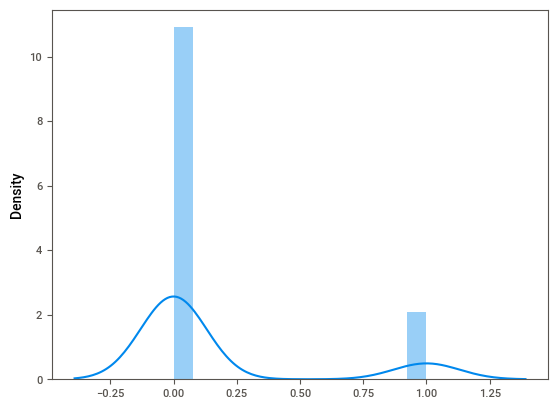

In [92]:
#Fasting_BloodSugar
#check distribution 
sns.distplot(x=data['Fasting_BloodSugar'])

In [93]:
#find Q1
Q1=data['Fasting_BloodSugar'].quantile(0.25)
print('lower quantile',Q1)

lower quantile 0.0


In [94]:
#find Q3
Q3=data['Fasting_BloodSugar'].quantile(0.75)
print('Upper quantile',Q3)

Upper quantile 0.0


In [95]:
#calculate IQR
IQR=Q3-Q1
IQR

0.0

In [96]:
#Find lower limit & upper limit
lower_limit=Q1-1.5*IQR
print('lower limit',lower_limit)

lower limit 0.0


In [97]:
upper_limit=Q3+1.5*IQR
print('Upper limit',upper_limit)

Upper limit 0.0


In [98]:
#find the values below the lower limit
data.loc[data['Fasting_BloodSugar']<lower_limit]

,ST_Segment,Thallium_Test,Resting_BP,ChestPain_Type,Vessels,Fasting_BloodSugar,Resting_ECG,Serum_Cholesterol,ST_Depression,Sex,Age,Max_HeartRate,Angina_Exercise,Heart_Disease


In [99]:
#since there is no outlier in lower limit no need to handle it.

In [100]:
#find the values above the upper limit
data.loc[data['Fasting_BloodSugar']>upper_limit]

,ST_Segment,Thallium_Test,Resting_BP,ChestPain_Type,Vessels,Fasting_BloodSugar,Resting_ECG,Serum_Cholesterol,ST_Depression,Sex,Age,Max_HeartRate,Angina_Exercise,Heart_Disease
19,1,normal,136,2,2,1,2,319,0.0,0,58,152,0,1
21,1,reversible_defect,108,4,3,1,0,233,0.1,1,52,147,0,0
27,1,normal,128,2,0,1,0,205,0.0,1,52,184,0,0
32,3,reversible_defect,140,4,0,1,2,203,3.1,1,53,155,1,1
36,1,reversible_defect,150,3,1,1,0,126,0.2,1,57,173,0,0
40,2,normal,150,3,0,1,0,243,1.0,1,61,137,1,0
42,1,normal,110,3,1,1,2,265,0.0,0,71,130,0,0
43,1,normal,140,3,1,1,2,417,0.8,0,65,157,0,0
46,2,normal,125,3,0,1,2,245,2.4,1,51,166,0,0
52,1,reversible_defect,130,4,3,1,2,330,1.8,1,63,132,1,1


In [101]:
#find the len of upper limit
len(data.loc[data['Fasting_BloodSugar']>upper_limit])


29

In [102]:
#len of data
len(data)

180

In [103]:
#devide len of upper limit by len of data
len(data.loc[data['Fasting_BloodSugar']>upper_limit])/len(data)

0.16111111111111112

In [104]:
#to convert it into percentage multiply by 100
(len(data.loc[data['Fasting_BloodSugar']>upper_limit])/len(data))*100

16.11111111111111

In [105]:
#the perceentage  is > 5% (greater than 5%), then dont handle it 

<Axes: ylabel='Density'>

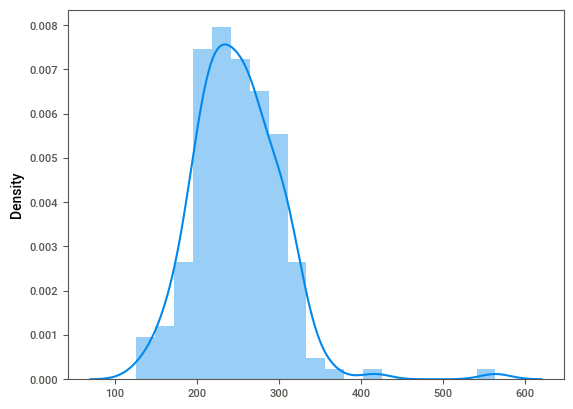

In [106]:
#Serum_Cholesterol
#check distribution 
sns.distplot(x=data['Serum_Cholesterol'])

In [107]:
#find Q1
Q1=data['Serum_Cholesterol'].quantile(0.25)
print('lower quantile',Q1)

lower quantile 213.75


In [108]:
#find Q3
Q3=data['Serum_Cholesterol'].quantile(0.75)
print('Upper quantile',Q3)

Upper quantile 281.25


In [109]:
#calculate IQR
IQR=Q3-Q1
IQR

67.5

In [110]:
#Find lower limit & upper limit
lower_limit=Q1-1.5*IQR
print('lower limit',lower_limit)

lower limit 112.5


In [111]:
upper_limit=Q3+1.5*IQR
print('Upper limit',upper_limit)

Upper limit 382.5


In [112]:
#find the values below the lower limit
data.loc[data['Serum_Cholesterol']<lower_limit]

,ST_Segment,Thallium_Test,Resting_BP,ChestPain_Type,Vessels,Fasting_BloodSugar,Resting_ECG,Serum_Cholesterol,ST_Depression,Sex,Age,Max_HeartRate,Angina_Exercise,Heart_Disease


In [113]:
#since there is no outlier in lower limit no need to handle it.

In [114]:
#find the values above the upper limit
data.loc[data['Serum_Cholesterol']>upper_limit]

,ST_Segment,Thallium_Test,Resting_BP,ChestPain_Type,Vessels,Fasting_BloodSugar,Resting_ECG,Serum_Cholesterol,ST_Depression,Sex,Age,Max_HeartRate,Angina_Exercise,Heart_Disease
43,1,normal,140,3,1,1,2,417,0.8,0,65,157,0,0
60,2,reversible_defect,115,3,0,0,2,564,1.6,0,67,160,0,0


In [115]:
#find the len of upper limit
len(data.loc[data['Serum_Cholesterol']>upper_limit])


2

In [116]:
#len of data
len(data)

180

In [117]:
#devide len of upper limit by len of data
len(data.loc[data['Serum_Cholesterol']>upper_limit])/len(data)

0.011111111111111112

In [118]:
#to convert it into percentage multiply by 100
(len(data.loc[data['Serum_Cholesterol']>upper_limit])/len(data))*100

1.1111111111111112

In [119]:
#1% of outlier is there , handle it by replacing those observations which giving you outlier by median since data is not normal

In [120]:
data.loc[data['Serum_Cholesterol']>upper_limit,'Serum_Cholesterol']=data['Serum_Cholesterol'].median()

In [121]:
#we successfully handle outliers wrt upper limit

<Axes: ylabel='Density'>

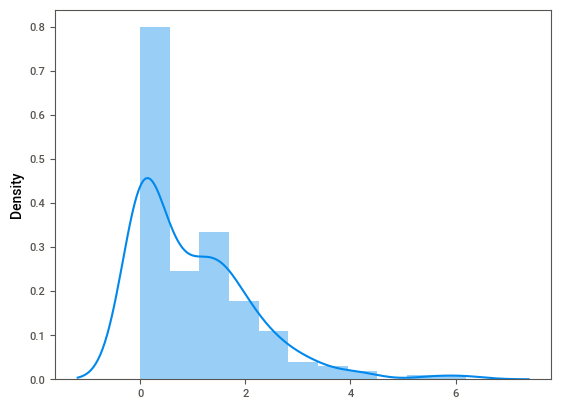

In [122]:
#ST_Depression
#check distribution 
sns.distplot(x=data['ST_Depression'])

In [123]:
#find Q1
Q1=data['ST_Depression'].quantile(0.25)
print('lower quantile',Q1)

lower quantile 0.0


In [124]:
#find Q3
Q3=data['ST_Depression'].quantile(0.75)
print('Upper quantile',Q3)

Upper quantile 1.6


In [125]:
#calculate IQR
IQR=Q3-Q1
IQR

1.6

In [126]:
#Find lower limit & upper limit
lower_limit=Q1-1.5*IQR
print('lower limit',lower_limit)

lower limit -2.4000000000000004


In [127]:
upper_limit=Q3+1.5*IQR
print('Upper limit',upper_limit)

Upper limit 4.0


In [128]:
#find the values below the lower limit
data.loc[data['ST_Depression']<lower_limit]

,ST_Segment,Thallium_Test,Resting_BP,ChestPain_Type,Vessels,Fasting_BloodSugar,Resting_ECG,Serum_Cholesterol,ST_Depression,Sex,Age,Max_HeartRate,Angina_Exercise,Heart_Disease


In [129]:
#since there is no outlier in lower limit no need to handle it.

In [130]:
#find the values above the upper limit
data.loc[data['ST_Depression']>upper_limit]

,ST_Segment,Thallium_Test,Resting_BP,ChestPain_Type,Vessels,Fasting_BloodSugar,Resting_ECG,Serum_Cholesterol,ST_Depression,Sex,Age,Max_HeartRate,Angina_Exercise,Heart_Disease
4,3,reversible_defect,130,1,0,0,2,270.0,4.2,1,59,145,0,0
112,2,reversible_defect,140,4,3,0,0,298.0,4.2,1,51,122,1,1
140,3,reversible_defect,140,4,0,0,0,217.0,5.6,1,55,111,1,1
162,3,reversible_defect,160,4,3,0,2,164.0,6.2,0,62,145,0,1


In [131]:
#find the len of upper limit
len(data.loc[data['ST_Depression']>upper_limit])


4

In [132]:
#len of data
len(data)

180

In [133]:
#devide len of upper limit by len of data
len(data.loc[data['ST_Depression']>upper_limit])/len(data)

0.022222222222222223

In [134]:
#to convert it into percentage multiply by 100
(len(data.loc[data['ST_Depression']>upper_limit])/len(data))*100

2.2222222222222223

In [ ]:
#2% of outlier is there , handle it by replacing those observations which giving you outlier by median since data is not normal

In [136]:
data.loc[data['ST_Depression']>upper_limit,'ST_Depression']=data['ST_Depression'].median()

In [ ]:
#we successfully handle outliers wrt upper limit

In [ ]:
##Encoding:

#Coversion of categorical columns into numerical columns


In [137]:
#check for categorical column
data.dtypes=='object'


ST_Segment            False
Thallium_Test          True
Resting_BP            False
ChestPain_Type        False
Vessels               False
Fasting_BloodSugar    False
Resting_ECG           False
Serum_Cholesterol     False
ST_Depression         False
Sex                   False
Age                   False
Max_HeartRate         False
Angina_Exercise       False
Heart_Disease         False
dtype: bool

In [138]:
# we have one categorical column dataset.


In [139]:
#Thallium_Test
data.Thallium_Test.unique()

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

<Axes: xlabel='Thallium_Test', ylabel='count'>

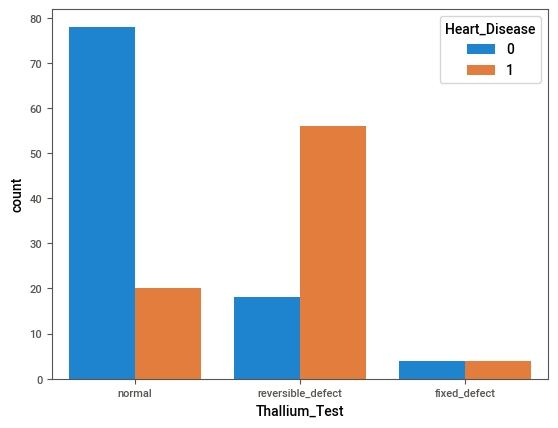

In [140]:
sns.countplot(x=data.Thallium_Test,hue=data.Heart_Disease)

In [141]:
#Manual encoding
data.Thallium_Test=data.Thallium_Test.map({'normal':2,'reversible_defect':1,'fixed_defect':0})

In [142]:
#check
data.head()

,ST_Segment,Thallium_Test,Resting_BP,ChestPain_Type,Vessels,Fasting_BloodSugar,Resting_ECG,Serum_Cholesterol,ST_Depression,Sex,Age,Max_HeartRate,Angina_Exercise,Heart_Disease
0,1,2,128,2,0,0,2,308.0,0.0,1,45,170,0,0
1,2,2,110,3,0,0,0,214.0,1.6,0,54,158,0,0
2,1,2,125,4,3,0,2,304.0,0.0,1,77,162,1,1
3,1,1,152,4,0,0,0,223.0,0.0,1,40,181,0,1
4,3,1,130,1,0,0,2,270.0,0.8,1,59,145,0,0


In [143]:
#Scaling
#min-max scaler
from sklearn.preprocessing import MinMaxScaler
#initialize
scaling=MinMaxScaler()
#scaling is applied on continuous data
#since 'Resting_BP', 'Serum_Cholesterol','ST_Depression', 'Age', 'Max_HeartRate' are continuous column apply scaling on thes columns

In [144]:
scaled_data=scaling.fit_transform(conti)
scaled_data

array([[0.39534884, 0.41552511, 0.        , 0.33333333, 0.69811321],
       [0.18604651, 0.20091324, 0.25806452, 0.52083333, 0.58490566],
       [0.36046512, 0.40639269, 0.        , 1.        , 0.62264151],
       [0.6744186 , 0.22146119, 0.        , 0.22916667, 0.80188679],
       [0.97674419, 0.32876712, 0.67741935, 0.625     , 0.46226415],
       [0.41860465, 0.12328767, 0.        , 0.27083333, 0.50943396],
       [0.65116279, 0.30136986, 0.41935484, 0.64583333, 0.5754717 ],
       [0.65116279, 0.34246575, 0.09677419, 0.58333333, 0.1509434 ],
       [0.88372093, 0.456621  , 0.5483871 , 0.625     , 0.41509434],
       [0.30232558, 0.21232877, 0.25806452, 0.4375    , 0.58490566],
       [0.30232558, 0.40182648, 0.06451613, 0.77083333, 0.51886792],
       [0.53488372, 0.2283105 , 0.        , 0.27083333, 0.77358491],
       [0.53488372, 0.47716895, 0.        , 0.72916667, 0.58490566],
       [0.51162791, 0.25114155, 0.03225806, 0.33333333, 0.52830189],
       [0.30232558, 0.23972603, 0.

In [145]:
#convert it into dataframe
df=pd.DataFrame(scaled_data,columns=['Resting_BP', 'Serum_Cholesterol',
       'ST_Depression', 'Age', 'Max_HeartRate'])
df     

,Resting_BP,Serum_Cholesterol,ST_Depression,Age,Max_HeartRate
0,0.395349,0.415525,0.000000,0.333333,0.698113
1,0.186047,0.200913,0.258065,0.520833,0.584906
2,0.360465,0.406393,0.000000,1.000000,0.622642
3,0.674419,0.221461,0.000000,0.229167,0.801887
4,0.976744,0.328767,0.677419,0.625000,0.462264
...,...,...,...,...,...
175,0.360465,0.292237,0.032258,0.791667,0.632075
176,1.000000,0.458904,0.548387,0.541667,0.198113
177,0.360465,0.417808,0.290323,0.729167,0.330189
178,0.348837,0.294521,0.000000,0.395833,0.745283


In [146]:
df1=data[['ST_Segment','Thallium_Test','ChestPain_Type', 'Vessels',
       'Fasting_BloodSugar', 'Resting_ECG',
        'Sex', 'Angina_Exercise',
       'Heart_Disease']]
df1

,ST_Segment,Thallium_Test,ChestPain_Type,Vessels,Fasting_BloodSugar,Resting_ECG,Sex,Angina_Exercise,Heart_Disease
0,1,2,2,0,0,2,1,0,0
1,2,2,3,0,0,0,0,0,0
2,1,2,4,3,0,2,1,1,1
3,1,1,4,0,0,0,1,0,1
4,3,1,1,0,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...
175,2,1,4,2,1,0,1,0,1
176,2,2,4,0,0,1,0,1,1
177,2,1,3,0,0,0,1,1,1
178,1,2,3,2,1,0,1,0,0


In [147]:
new_data=pd.concat([df,df1],axis=1)
new_data

,Resting_BP,Serum_Cholesterol,ST_Depression,Age,Max_HeartRate,ST_Segment,Thallium_Test,ChestPain_Type,Vessels,Fasting_BloodSugar,Resting_ECG,Sex,Angina_Exercise,Heart_Disease
0,0.395349,0.415525,0.000000,0.333333,0.698113,1,2,2,0,0,2,1,0,0
1,0.186047,0.200913,0.258065,0.520833,0.584906,2,2,3,0,0,0,0,0,0
2,0.360465,0.406393,0.000000,1.000000,0.622642,1,2,4,3,0,2,1,1,1
3,0.674419,0.221461,0.000000,0.229167,0.801887,1,1,4,0,0,0,1,0,1
4,0.976744,0.328767,0.677419,0.625000,0.462264,3,1,1,0,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.360465,0.292237,0.032258,0.791667,0.632075,2,1,4,2,1,0,1,0,1
176,1.000000,0.458904,0.548387,0.541667,0.198113,2,2,4,0,0,1,0,1,1
177,0.360465,0.417808,0.290323,0.729167,0.330189,2,1,3,0,0,0,1,1,1
178,0.348837,0.294521,0.000000,0.395833,0.745283,1,2,3,2,1,0,1,0,0


# Feature Selection

In [148]:
#drop the irrelevant column 
#we already dropped it


<Axes: >

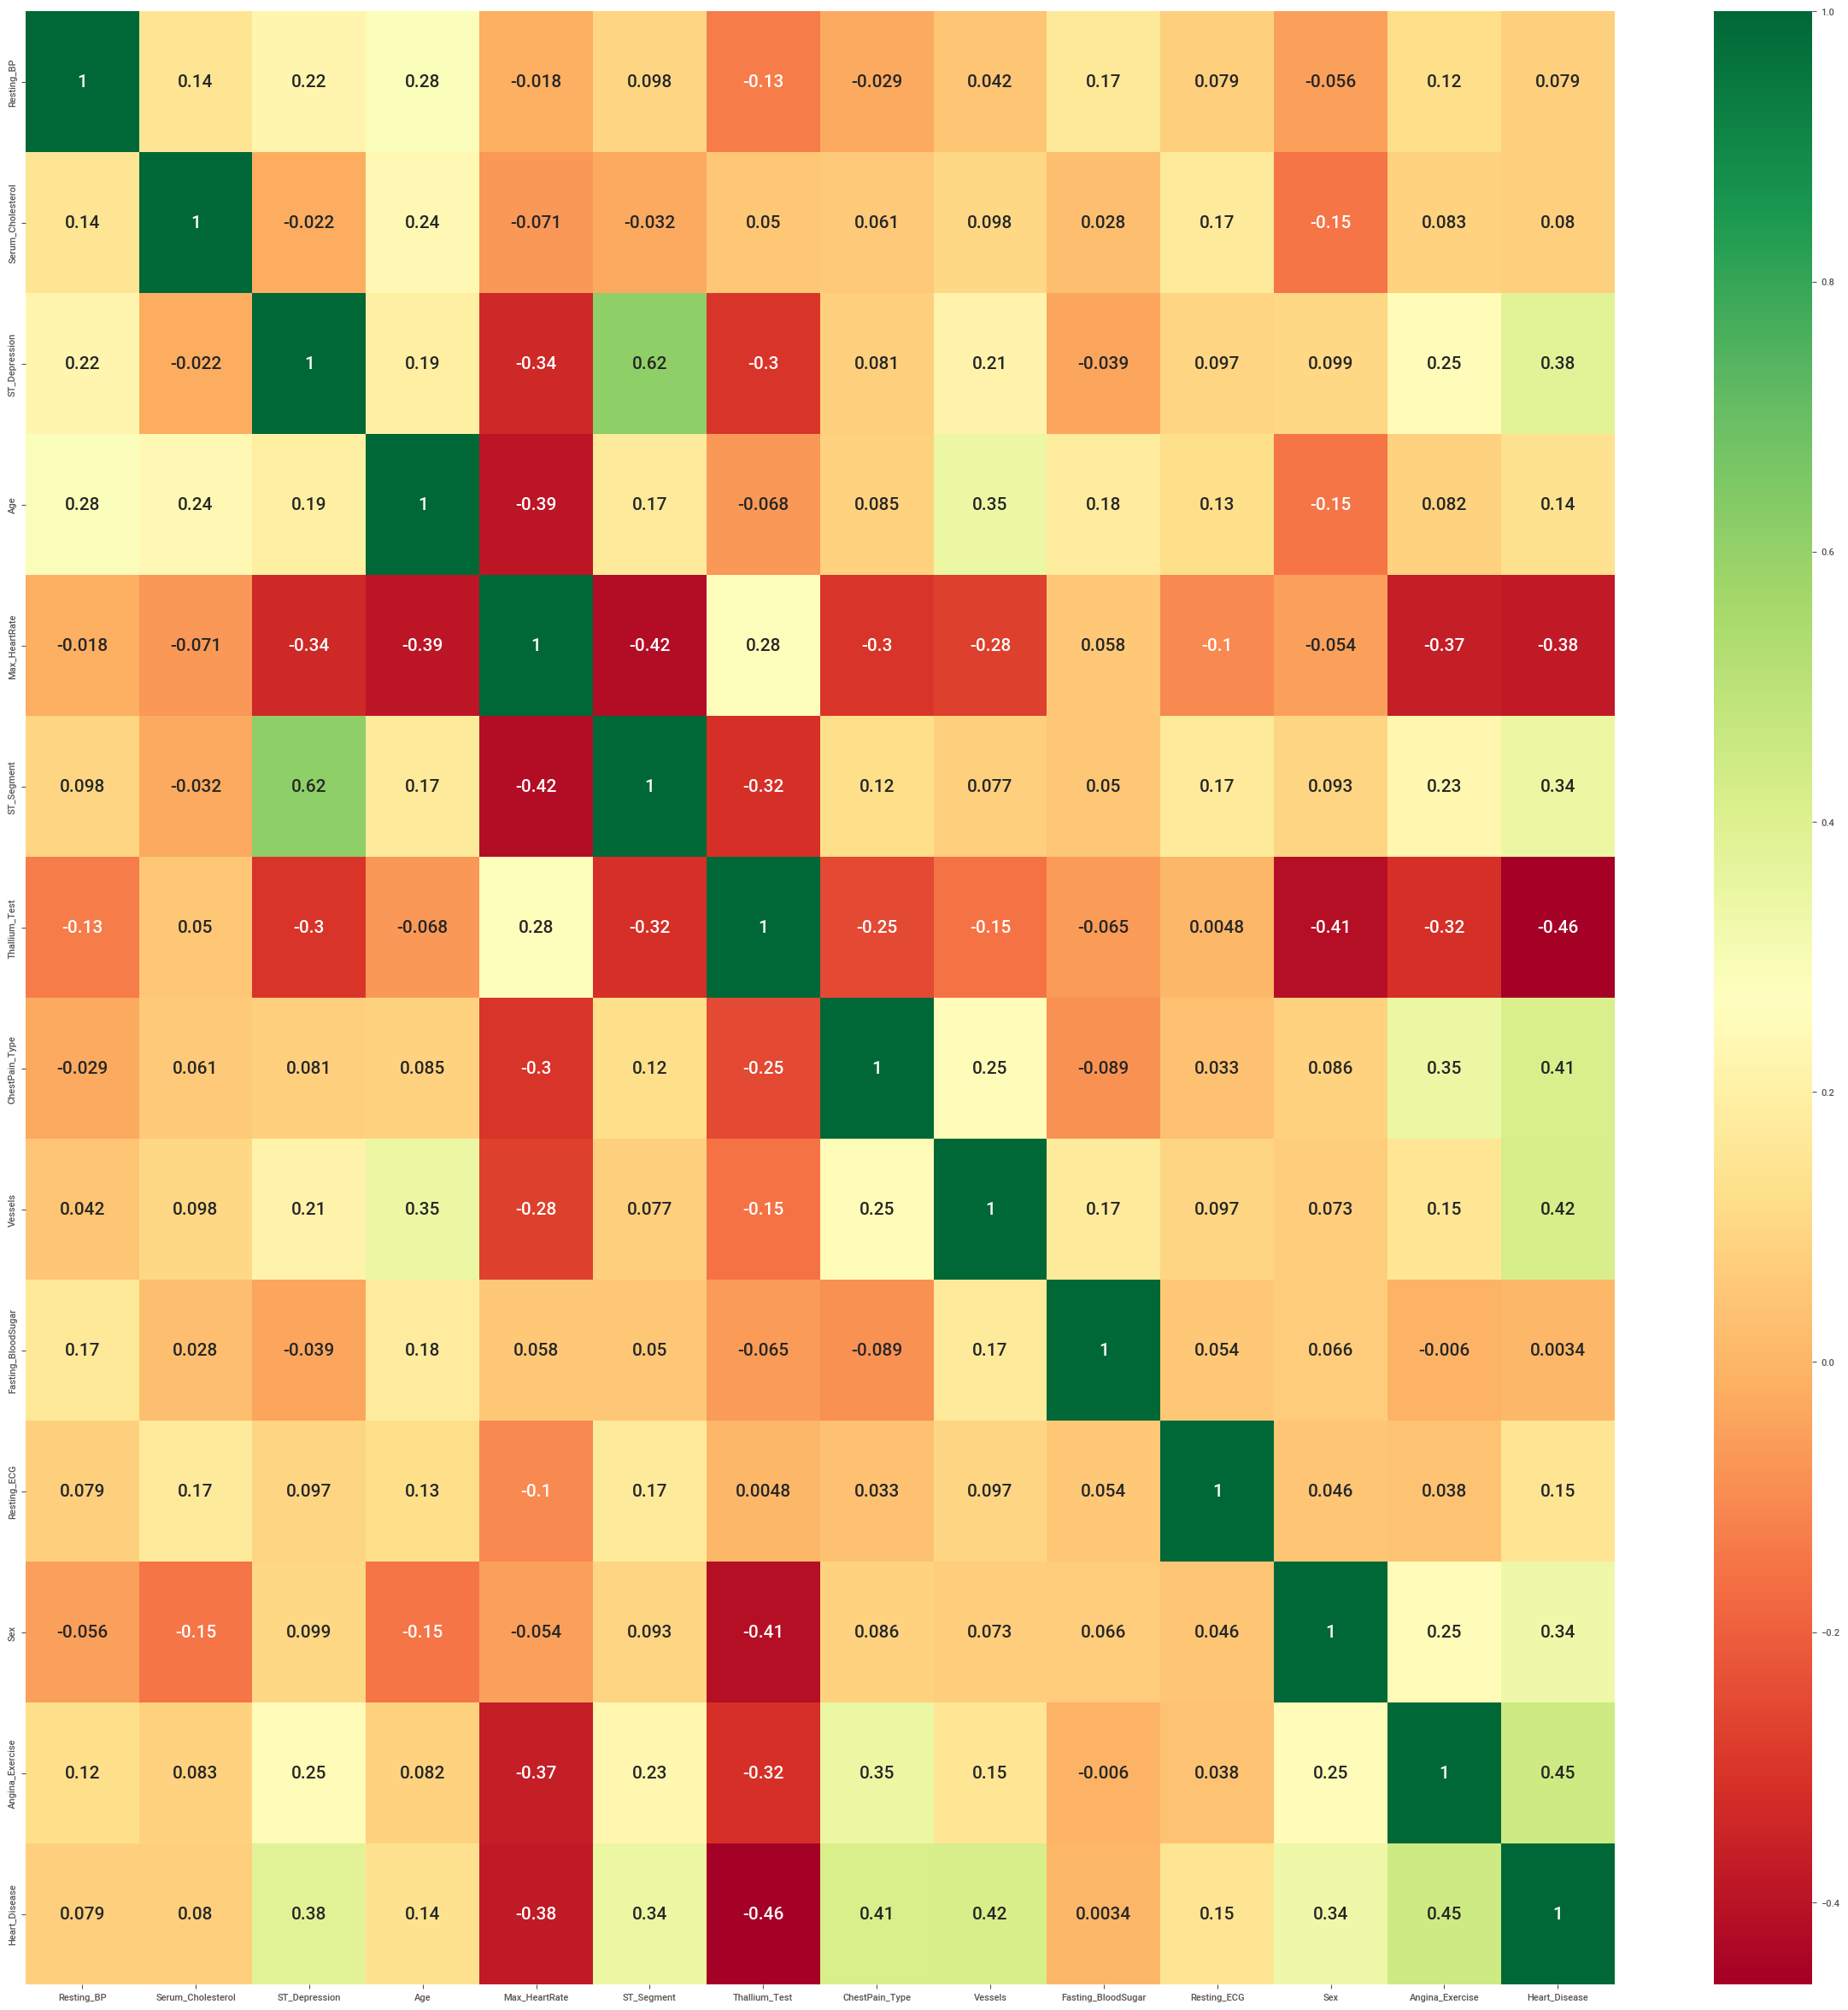

In [149]:
#Correlation
plt.figure(figsize=(30,30)) #canvas size
sns.heatmap(new_data.corr(),annot=True,cmap='RdYlGn',annot_kws={'size':15})

In [150]:
#since no column is showing crrelation of more than 85% , therefore we are not dropping any column

In [151]:
#Now the data is completely ready and clean.....so we are going to train the model 

# Model Building

In [152]:
#split data into x & y
x=data.drop('Heart_Disease',axis=1)
y=data.Heart_Disease

In [153]:
#split the data for training and testing 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [154]:
#Balancing the data
#data is imbalanced, so we have to balanced the data=> using SMOTE
#balancing should be applied here, after we split the data into train and test


In [155]:
# Install imblearn package

!pip install imblearn

In [156]:
#Balancing the data
from imblearn.over_sampling import SMOTE
#Object creation
smote=SMOTE()     
#Importing counter to check count of each label
from collections import Counter
#Checking count for each class
print('Actual Classes',Counter(y_train))
#Applying sampling on target variable
x_smote, y_smote = smote.fit_resample(x_train,y_train)    
#Checking count after sampling for each class
print('Smote Classes',Counter(y_smote))

Actual Classes Counter({0: 75, 1: 51})
Smote Classes Counter({0: 75, 1: 75})


## Apply Algorithm:

1) Logistic Regression
2) SVM
3) KNN
4) Bagging
5) Decision Tree
6) Random Forest
7) Gradient Boosting
8) XG Boost

# Evaluation of Model

In [157]:
#Importing evaluation metrics
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

## Logistic Regression

In [158]:
#import logistic regression model
from sklearn.linear_model import LogisticRegression
#initialise the model
LR=LogisticRegression()
#train the model
LR.fit(x_smote,y_smote)


LogisticRegression()

In [159]:
y_pred1=LR.predict(x_test)

In [160]:
confusion_matrix(y_test,y_pred1)

array([[22,  3],
       [ 9, 20]], dtype=int64)

In [161]:
accuracy_score(y_test,y_pred1)

0.7777777777777778

In [162]:
#Precision
precision_score(y_test,y_pred1) 

0.8695652173913043

In [163]:
#Recall
recall_score(y_test,y_pred1) 

0.6896551724137931

In [164]:
#f1 score
f1_score(y_test,y_pred1)


0.7692307692307693

In [165]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.71      0.88      0.79        25
           1       0.87      0.69      0.77        29

    accuracy                           0.78        54
   macro avg       0.79      0.78      0.78        54
weighted avg       0.80      0.78      0.78        54



In [166]:
from sklearn.metrics import roc_curve,auc

In [168]:
False_positive_rate,True_positive_rate,Thresholds=roc_curve(y_test,y_pred1)

In [169]:
roc_auc_score=auc(False_positive_rate,True_positive_rate)
print(roc_auc_score)

0.7848275862068965


## SVM

In [170]:
#Import SVC
from sklearn.svm import SVC
#initialise the model
SVM=SVC()
#train the model
SVM.fit(x_smote,y_smote)

SVC()

In [171]:
y_pred2=SVM.predict(x_test)

In [172]:
confusion_matrix(y_test,y_pred2)

array([[18,  7],
       [14, 15]], dtype=int64)

In [173]:
accuracy_score(y_test,y_pred2)

0.6111111111111112

In [174]:
#Precision
precision_score(y_test,y_pred2) 

0.6818181818181818

In [175]:
#Recall
recall_score(y_test,y_pred2) 

0.5172413793103449

In [176]:
#f1 score
f1_score(y_test,y_pred2) 

0.5882352941176471

In [177]:
classification_report=print(classification_report(y_test,y_pred2)) 

              precision    recall  f1-score   support

           0       0.56      0.72      0.63        25
           1       0.68      0.52      0.59        29

    accuracy                           0.61        54
   macro avg       0.62      0.62      0.61        54
weighted avg       0.63      0.61      0.61        54



In [178]:
#Cross Validation
from sklearn.model_selection import cross_val_score

In [179]:
score=cross_val_score(SVM,x,y,cv=10,scoring='f1')
print(score)

[0.4        0.36363636 0.61538462 0.66666667 0.22222222 0.30769231
 0.5        0.16666667 0.54545455 0.5       ]


Model is not that much good because there are variations between scores

In [180]:
#mean
print('cross validation score',score.mean())

cross validation score 0.4287723387723387


In [181]:
#std
#std is < 0.05 then we say model is good otherwise bad
print('standard deviation',score.std())

standard deviation 0.15693074921422626


Model is not good because the std is > 0.05

## KNN

In [182]:
#Import KNN classifier
from sklearn.neighbors import KNeighborsClassifier
#initialise the model
KNN=KNeighborsClassifier(n_neighbors=3)
#train the model
KNN.fit(x_smote,y_smote)

KNeighborsClassifier(n_neighbors=3)

In [187]:
y_pred=KNN.predict(x_test)

In [188]:
accuracy_score(y_test,y_pred)

0.48148148148148145

In [189]:
#How to select a precise K value
error=[]
for k in range(1,11):
    KNN=KNeighborsClassifier(n_neighbors=k)
    KNN.fit(x_smote,y_smote)
    y_pred=KNN.predict(x_test)
    error.append(np.mean(y_pred!=y_test))

Text(0, 0.5, 'Error')

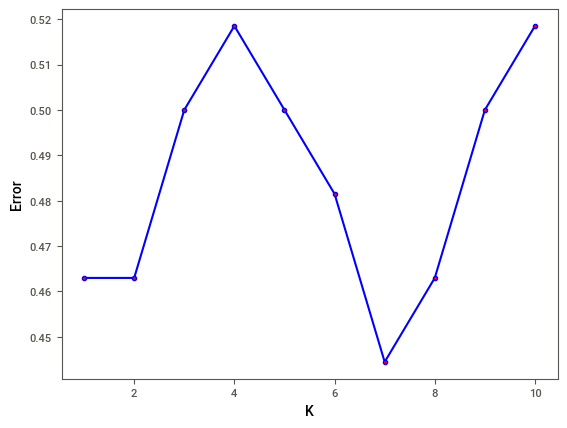

In [190]:
plt.plot(range(1,11),error,color='blue',marker='o',markerfacecolor='red')
plt.xlabel('K')
plt.ylabel('Error')

In [191]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=7)
KNN.fit(x_smote,y_smote)

KNeighborsClassifier(n_neighbors=7)

In [192]:
y_pred3=KNN.predict(x_test)

In [193]:
confusion_matrix(y_test,y_pred3)

array([[20,  5],
       [19, 10]], dtype=int64)

In [194]:
accuracy_score(y_test,y_pred3)

0.5555555555555556

In [195]:
#Precision
precision_score(y_test,y_pred3) 

0.6666666666666666

In [196]:
#Recall
recall_score(y_test,y_pred3) 

0.3448275862068966

In [197]:
#f1 score
f1_score(y_test,y_pred3) 

0.4545454545454545

## Bagging

In [199]:
# Import Bagging  (base estimator=LR)
from sklearn.ensemble import BaggingClassifier
#initialise the model
BAG=BaggingClassifier(base_estimator=LR,n_estimators=200)
#train the model
BAG.fit(x_smote,y_smote)


BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=200)

In [200]:
y_pred4=BAG.predict(x_test)

In [201]:
confusion_matrix(y_test,y_pred4)

array([[22,  3],
       [ 9, 20]], dtype=int64)

In [202]:
accuracy_score(y_test,y_pred4)

0.7777777777777778

In [203]:
#Precision
precision_score(y_test,y_pred4) 

0.8695652173913043

In [204]:
#Recall
recall_score(y_test,y_pred4) 

0.6896551724137931

In [205]:
#f1 score
f1_score(y_test,y_pred4) 

0.7692307692307693

In [208]:
# Import Bagging  (base estimator=KNN)
from sklearn.ensemble import BaggingClassifier
#initialise the model
BAG=BaggingClassifier(base_estimator=KNN,n_estimators=200)
#train the model
BAG.fit(x_smote,y_smote)


BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=7),
                  n_estimators=200)

In [209]:
y_pred=BAG.predict(x_test)

In [210]:
confusion_matrix(y_test,y_pred)

array([[18,  7],
       [19, 10]], dtype=int64)

In [211]:
accuracy_score(y_test,y_pred)

0.5185185185185185

In [212]:
#Precision
precision_score(y_test,y_pred) 

0.5882352941176471

In [213]:
#Recall
recall_score(y_test,y_pred) 

0.3448275862068966

In [214]:
#f1 score
f1_score(y_test,y_pred) 

0.4347826086956522

## Decision Tree

In [216]:
#import  Decision Tree
from sklearn.tree import DecisionTreeClassifier
#initialise the model
DT=DecisionTreeClassifier()
#train the model
DT.fit(x_smote,y_smote)

DecisionTreeClassifier()

In [217]:
y_pred5=DT.predict(x_test)

In [218]:
confusion_matrix(y_test,y_pred5)

array([[22,  3],
       [12, 17]], dtype=int64)

In [219]:
accuracy_score(y_test,y_pred5)

0.7222222222222222

In [220]:
#Precision
precision_score(y_test,y_pred5) 

0.85

In [221]:
#Recall
recall_score(y_test,y_pred5) 

0.5862068965517241

In [222]:
#f1 score
f1_score(y_test,y_pred5) 

0.6938775510204082

## Random Forest

In [224]:
#import Random Forest
from sklearn.ensemble import RandomForestClassifier
#initialise teh model
RF=RandomForestClassifier()
#train the model
RF.fit(x_smote,y_smote)


RandomForestClassifier()

In [225]:
#prediction
y_pred6=RF.predict(x_test)

In [226]:
confusion_matrix(y_test,y_pred6)

array([[24,  1],
       [10, 19]], dtype=int64)

In [227]:
accuracy_score(y_test,y_pred6)

0.7962962962962963

In [228]:
#Precision
precision_score(y_test,y_pred6) 

0.95

In [229]:
#Recall
recall_score(y_test,y_pred6) 

0.6551724137931034

In [230]:
#f1 score
f1_score(y_test,y_pred6) 

0.7755102040816326

## Gradient Boosting


In [232]:
#GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(n_estimators=78)
GB.fit(x_train,y_train)


GradientBoostingClassifier(n_estimators=78)

In [233]:
y_pred7=GB.predict(x_test)

In [234]:
confusion_matrix(y_test,y_pred7)

array([[23,  2],
       [ 9, 20]], dtype=int64)

In [235]:
accuracy_score(y_test,y_pred7)

0.7962962962962963

In [236]:
#Precision
precision_score(y_test,y_pred7) 

0.9090909090909091

In [237]:
#Recall
recall_score(y_test,y_pred7) 

0.6896551724137931

In [238]:
#f1 score
f1_score(y_test,y_pred7) 

0.7843137254901961

## XG Boost

In [239]:
# Installing xg boost
! pip install xgboost

In [240]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(x_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [241]:
y_pred8=model.predict(x_test)

In [242]:
confusion_matrix(y_test,y_pred8)

array([[24,  1],
       [ 9, 20]], dtype=int64)

In [243]:
accuracy_score(y_test,y_pred8)

0.8148148148148148

In [244]:
#Precision
precision_score(y_test,y_pred8) 

0.9523809523809523

In [245]:
#Recall
recall_score(y_test,y_pred8) 

0.6896551724137931

In [246]:
#f1 score
f1_score(y_test,y_pred8) 

0.7999999999999999

# Hyperparameter Tunning

### SVM


In [248]:
#Gridsearch cv:
from sklearn.model_selection import GridSearchCV

In [249]:
#define hyperparameter range
param_grid={'C':[0.1,5,10,50,60,70],'gamma':[1,0.1,0.01,0.001,0.0001],'random_state':list(range(1,20))}

In [250]:
#apply the model
model=SVC()

In [251]:
#initialise gridsearchcv
grid=GridSearchCV(model,param_grid,verbose=2,scoring='f1',cv=5)  
grid.fit(x,y)

Fitting 5 folds for each of 570 candidates, totalling 2850 fits
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=3; total time=   0.0s
[CV] END .....................C=0.1, gamma=1,

[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................

[CV] END ..................C=0.1, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=9; total time=   0.0s
[CV] END ..................C

[CV] END .................C=0.1, gamma=0.001, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=10; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=10; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=10; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=10; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=10; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=11; total time=   0.0s
[CV] END ................C=0

[CV] END ...............C=0.1, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ...............C=0.

[CV] END ......................C=5, gamma=1, random_state=16; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=16; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=16; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=16; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=16; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=17; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=17; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=17; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=17; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=17; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=18; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=18; total time=   0.0s
[CV] END ...................

[CV] END ....................C=5, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................

[CV] END ...................C=5, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ...................

[CV] END ..................C=5, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END ..................C

[CV] END ......................C=10, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=9; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=11; total time=   0.0s
[CV] END ...................

[CV] END ...................C=10, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................

[CV] END ..................C=10, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C

[CV] END .................C=10, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=

[CV] END ......................C=50, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=5; total time=   0.0s
[CV] END ...................

[CV] END ....................C=50, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ...................

[CV] END ..................C=50, gamma=0.01, random_state=10; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=10; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=10; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=10; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=11; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=11; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=11; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=11; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=11; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=12; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=12; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=12; total time=   0.0s
[CV] END ..................C

[CV] END .................C=50, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=

[CV] END ................C=50, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=1; total time=   0.0s
[CV] END ...................

[CV] END ....................C=60, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................

[CV] END ...................C=60, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ...................

[CV] END ..................C=60, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=

[CV] END ................C=60, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=6

[CV] END .....................C=70, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=18; total time=   0.0s
[CV] END ...................

[CV] END ...................C=70, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ...................

[CV] END ..................C=70, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C

[CV] END .................C=70, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 5, 10, 50, 60, 70],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='f1', verbose=2)

In [253]:
print(grid.best_params_)

{'C': 70, 'gamma': 0.0001, 'random_state': 1}


In [254]:
m=SVC(C=70, gamma=0.0001,random_state=1)
m.fit(x_smote,y_smote)

SVC(C=70, gamma=0.0001, random_state=1)

In [255]:
y_pred=m.predict(x_test)

In [256]:
accuracy_score(y_test,y_pred)

0.6481481481481481

### Decision Tree



In [257]:
from sklearn.model_selection import GridSearchCV

In [258]:
params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 20))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 20)),
}

In [259]:
#ApplY gridsearch CV
dt=DecisionTreeClassifier(random_state=3)
dt_cv=GridSearchCV(dt,params,scoring='accuracy',n_jobs=-1,verbose=1,cv=3)

dt_cv.fit(x_smote,y_smote)
best_params=dt_cv.best_params_
print(f'best param:{best_params}')

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
best param:{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [260]:
dt_cv.best_score_

0.82

In [261]:
model=DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=1, min_samples_split=2, splitter='best')
model.fit(x_smote,y_smote)
y_pred=model.predict(x_test)

In [262]:
y_pred_train=model.predict(x_smote)

In [263]:
accuracy_score(y_test,y_pred) #testing

0.7592592592592593

In [264]:
accuracy_score(y_smote,y_pred_train) #training

0.94

### Random Forest

In [265]:
from sklearn.model_selection import RandomizedSearchCV
#no. of estimators or no. of decision tree, linspace=linearly spaced values(start:stop:step)
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
#auto,random,square root of features
max_features = ['auto', 'sqrt']
#max-depth
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]

max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
#sampling:  it is with replacement or without
bootstrap = [True, False]

In [266]:
#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)    

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='accuracy',param_distributions=random_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)
rf_cv.fit(x_smote, y_smote)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 2000, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False})


In [267]:
rf_clf2 = RandomForestClassifier(n_estimators= 2000, min_samples_split=10, min_samples_leaf= 1, max_features='sqrt', max_depth=10, bootstrap=False)#passing best parameter to randomforest
rf_clf2.fit(x_smote,y_smote)
y_predict=rf_clf2.predict(x_test)


In [268]:
#training accuracy
y_train_pred=rf_clf2.predict(x_train)

In [269]:
#testing accuracy
accuracy_score(y_test,y_predict)

0.8333333333333334

In [270]:
#training accuracy
accuracy_score(y_train,y_train_pred)

0.9920634920634921

### XG Boost

In [271]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}


In [272]:
XGB = XGBClassifier(random_state=42,verbosity=0)
rcv= RandomizedSearchCV(estimator=XGB, scoring='f1',param_distributions=param_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)

In [273]:
rcv.fit(x_train, y_train)##training data on randomsearch cv
cv_best_params = rcv.best_params_##it will give you best parameters
print(f"Best paramters: {cv_best_params})")##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 51.2, 'reg_alpha': 0.8, 'n_estimators': 65, 'max_depth': 11, 'learning_rate': 0.1, 'gamma': 0.1})


In [274]:
XGB2=XGBClassifier(reg_lambda= 51.2, reg_alpha=0.8, n_estimators=65, max_depth=11,
                   learning_rate=0.1, gamma=0.1)
XGB2.fit(x_train, y_train)      #training
y_predict=XGB2.predict(x_test)  #testing

In [275]:
y_train_pred=XGB2.predict(x_train)

In [276]:
accuracy_score(y_test,y_predict)

0.7592592592592593

# Conclusion:
-Logistic Regression, Random Forest, Gradient Boosting and XG Boost are more suitable models for Heart Disease Prediction.
 
-Depends upon hyperparameter accuracy changes.

-It is difficult to manually determine the odds of getting heart disease based on risk factors. However, machine learning techniques are useful to predict the output from existing data.

